# Project : House Prices: Advanced Regression Techniques
---

## 1. Data Introduce
### 1.1 Purpose :   Predict SalePrice

### 1.2 Data set:
   > - Use house data in Ames. Iowa
   
   > - Train Data : It consists of 81 variables and 1460 house data

   > - Test Data  : It consists of 80 variables and 1459 house data

   > - Total Data : 2919 house data
   > - [Source : House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques")

### 1.3 Evaluation
   > - Root-Mean-Squared-Error (RMSE)  

$$
RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}
$$


### 2. Exploring the Data 
Let's start with importing the necessary libaries, reading in the data and checking out the dataset.

Note that the last column from this dataset, 'SalePrice' will be our target label. All other columns are features about each individual in house database

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy.stats import norm, skew 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("./Input/train.csv")
test = pd.read_csv("./Input/test.csv")

# Success - Display the first record
display(train.head(n=1))

/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  

[1 rows x 81 columns]

#### (1) Check data

In [2]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


#### Comments :
There are 1460 instances of training data and 1460 of test data. Total number of attributes equals 81

#### (2) Status of Train data

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

#### Comment :
1. Count :Some data such as LotFrontage and MasVnrArea are lost
2. Mean & 50% : Some data is biased to a certain value

#### (3) Explore SalePrice 

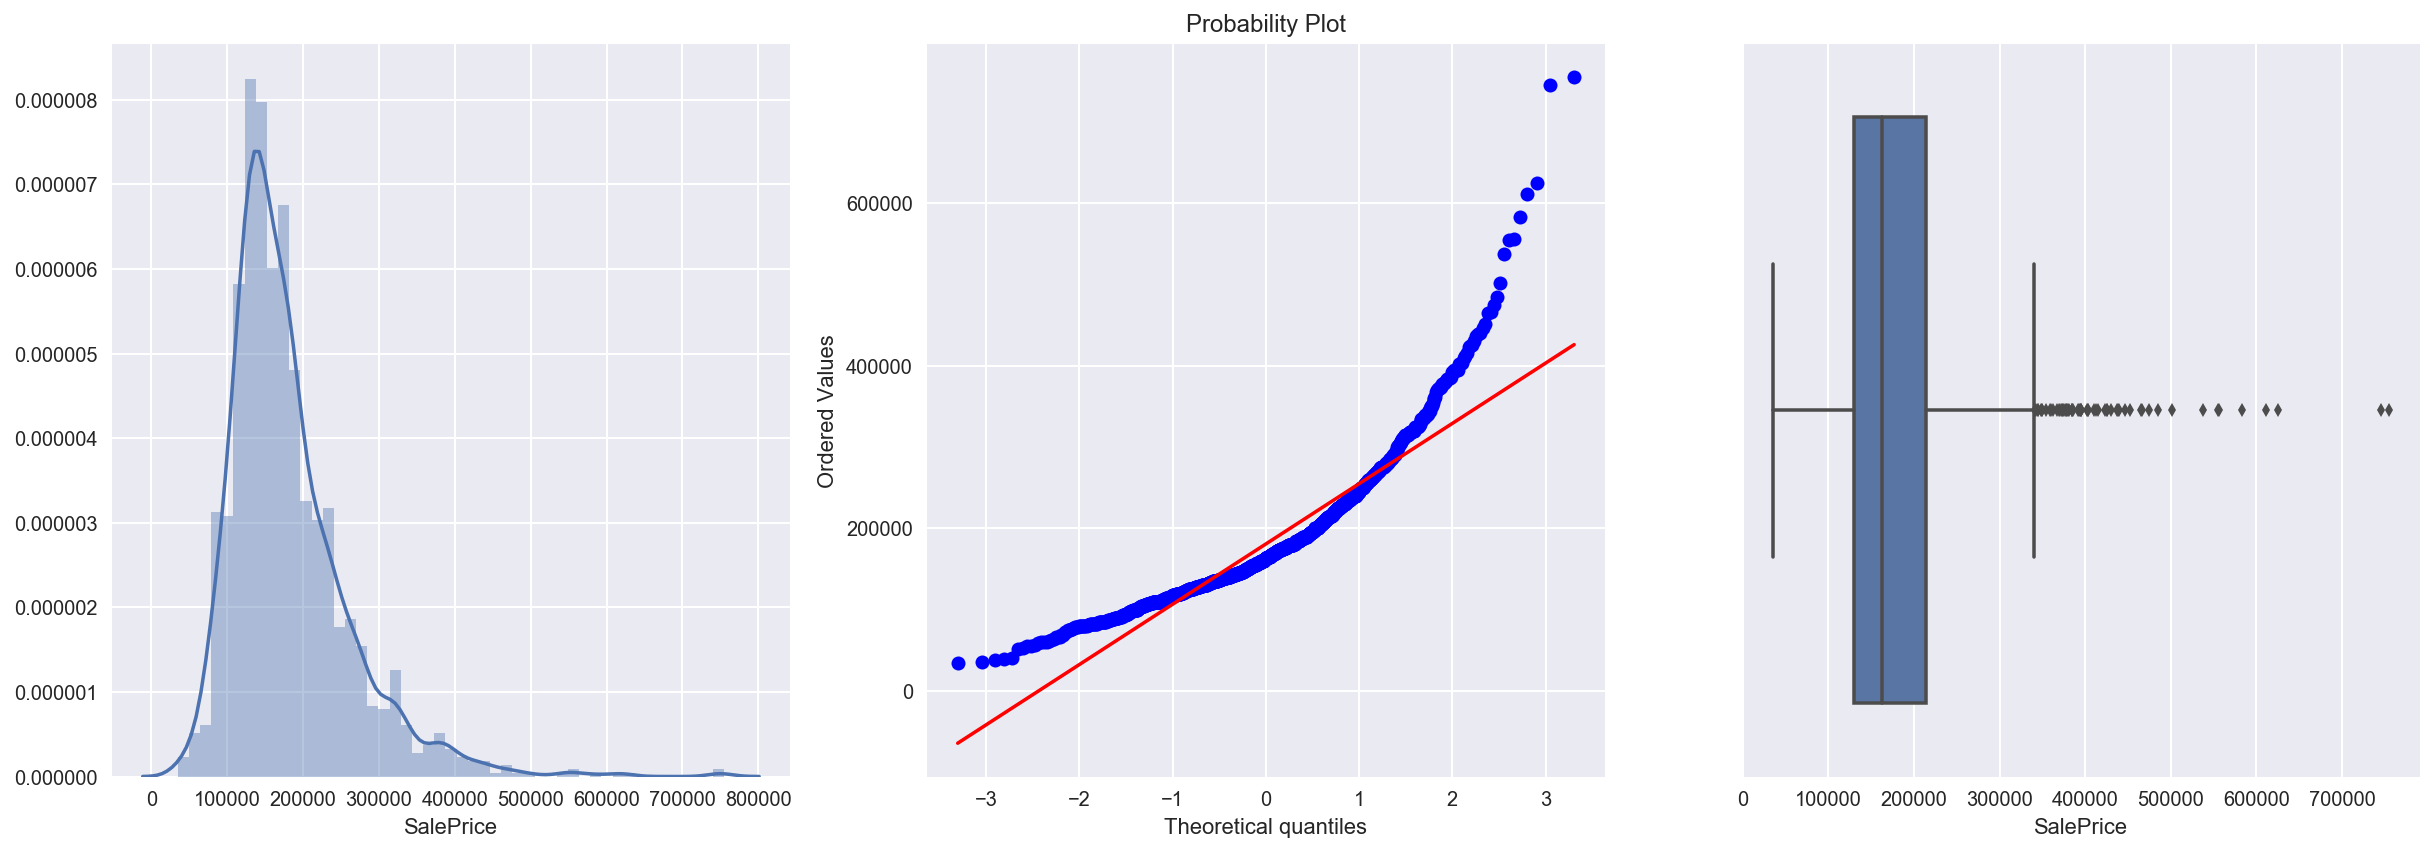

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

Skewness: 1.882876
Kurtosis: 6.536282


In [4]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

print(train["SalePrice"].describe(),"\n")

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

#### Comments :
1. It is apparent that SalePrice doesn't follow normal distribution and has positive skewness.

#### (4) SalePrice log transformation

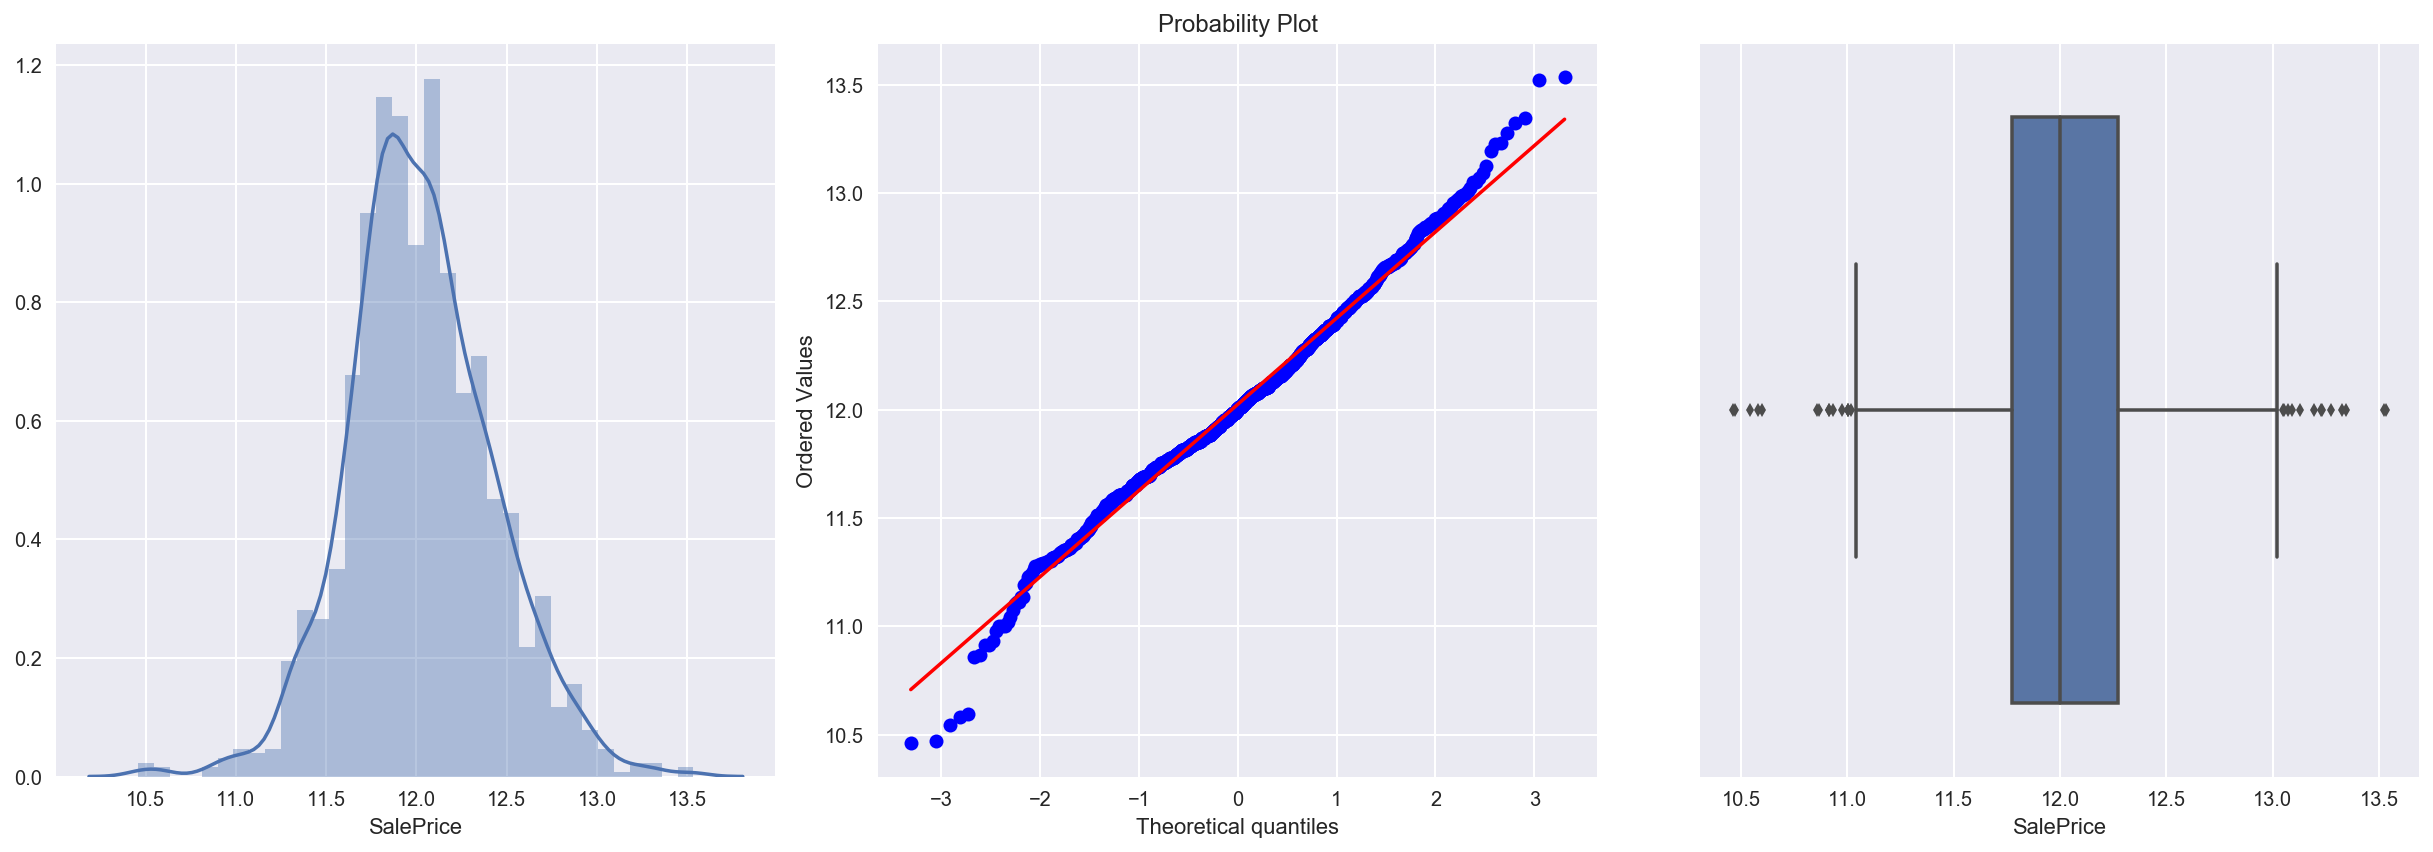

In [5]:
nomalized_SalePrice = np.log1p(train["SalePrice"])

plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(nomalized_SalePrice)

plt.subplot(132)
stats.probplot(nomalized_SalePrice, plot=plt)

plt.subplot(133)
sns.boxplot(nomalized_SalePrice)
plt.tight_layout()
plt.show()

#### Comment:
1. After log transformation, it seems to follow normal distribution.

### 2-2 Feature Type

#### (1) Check Numerical and Catergorical variables

In [6]:
# Because the MSSubClass variable is a category value, change numeric data to character data
train["MSSubClass"] = train["MSSubClass"].astype('str')

In [7]:
# Divide into numeric and categorical variables
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [8]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 37 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 44 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC

#### (2) Graph for numerical features with  SalePrice
It also would be useful to see how sale price compares to each independent variable.

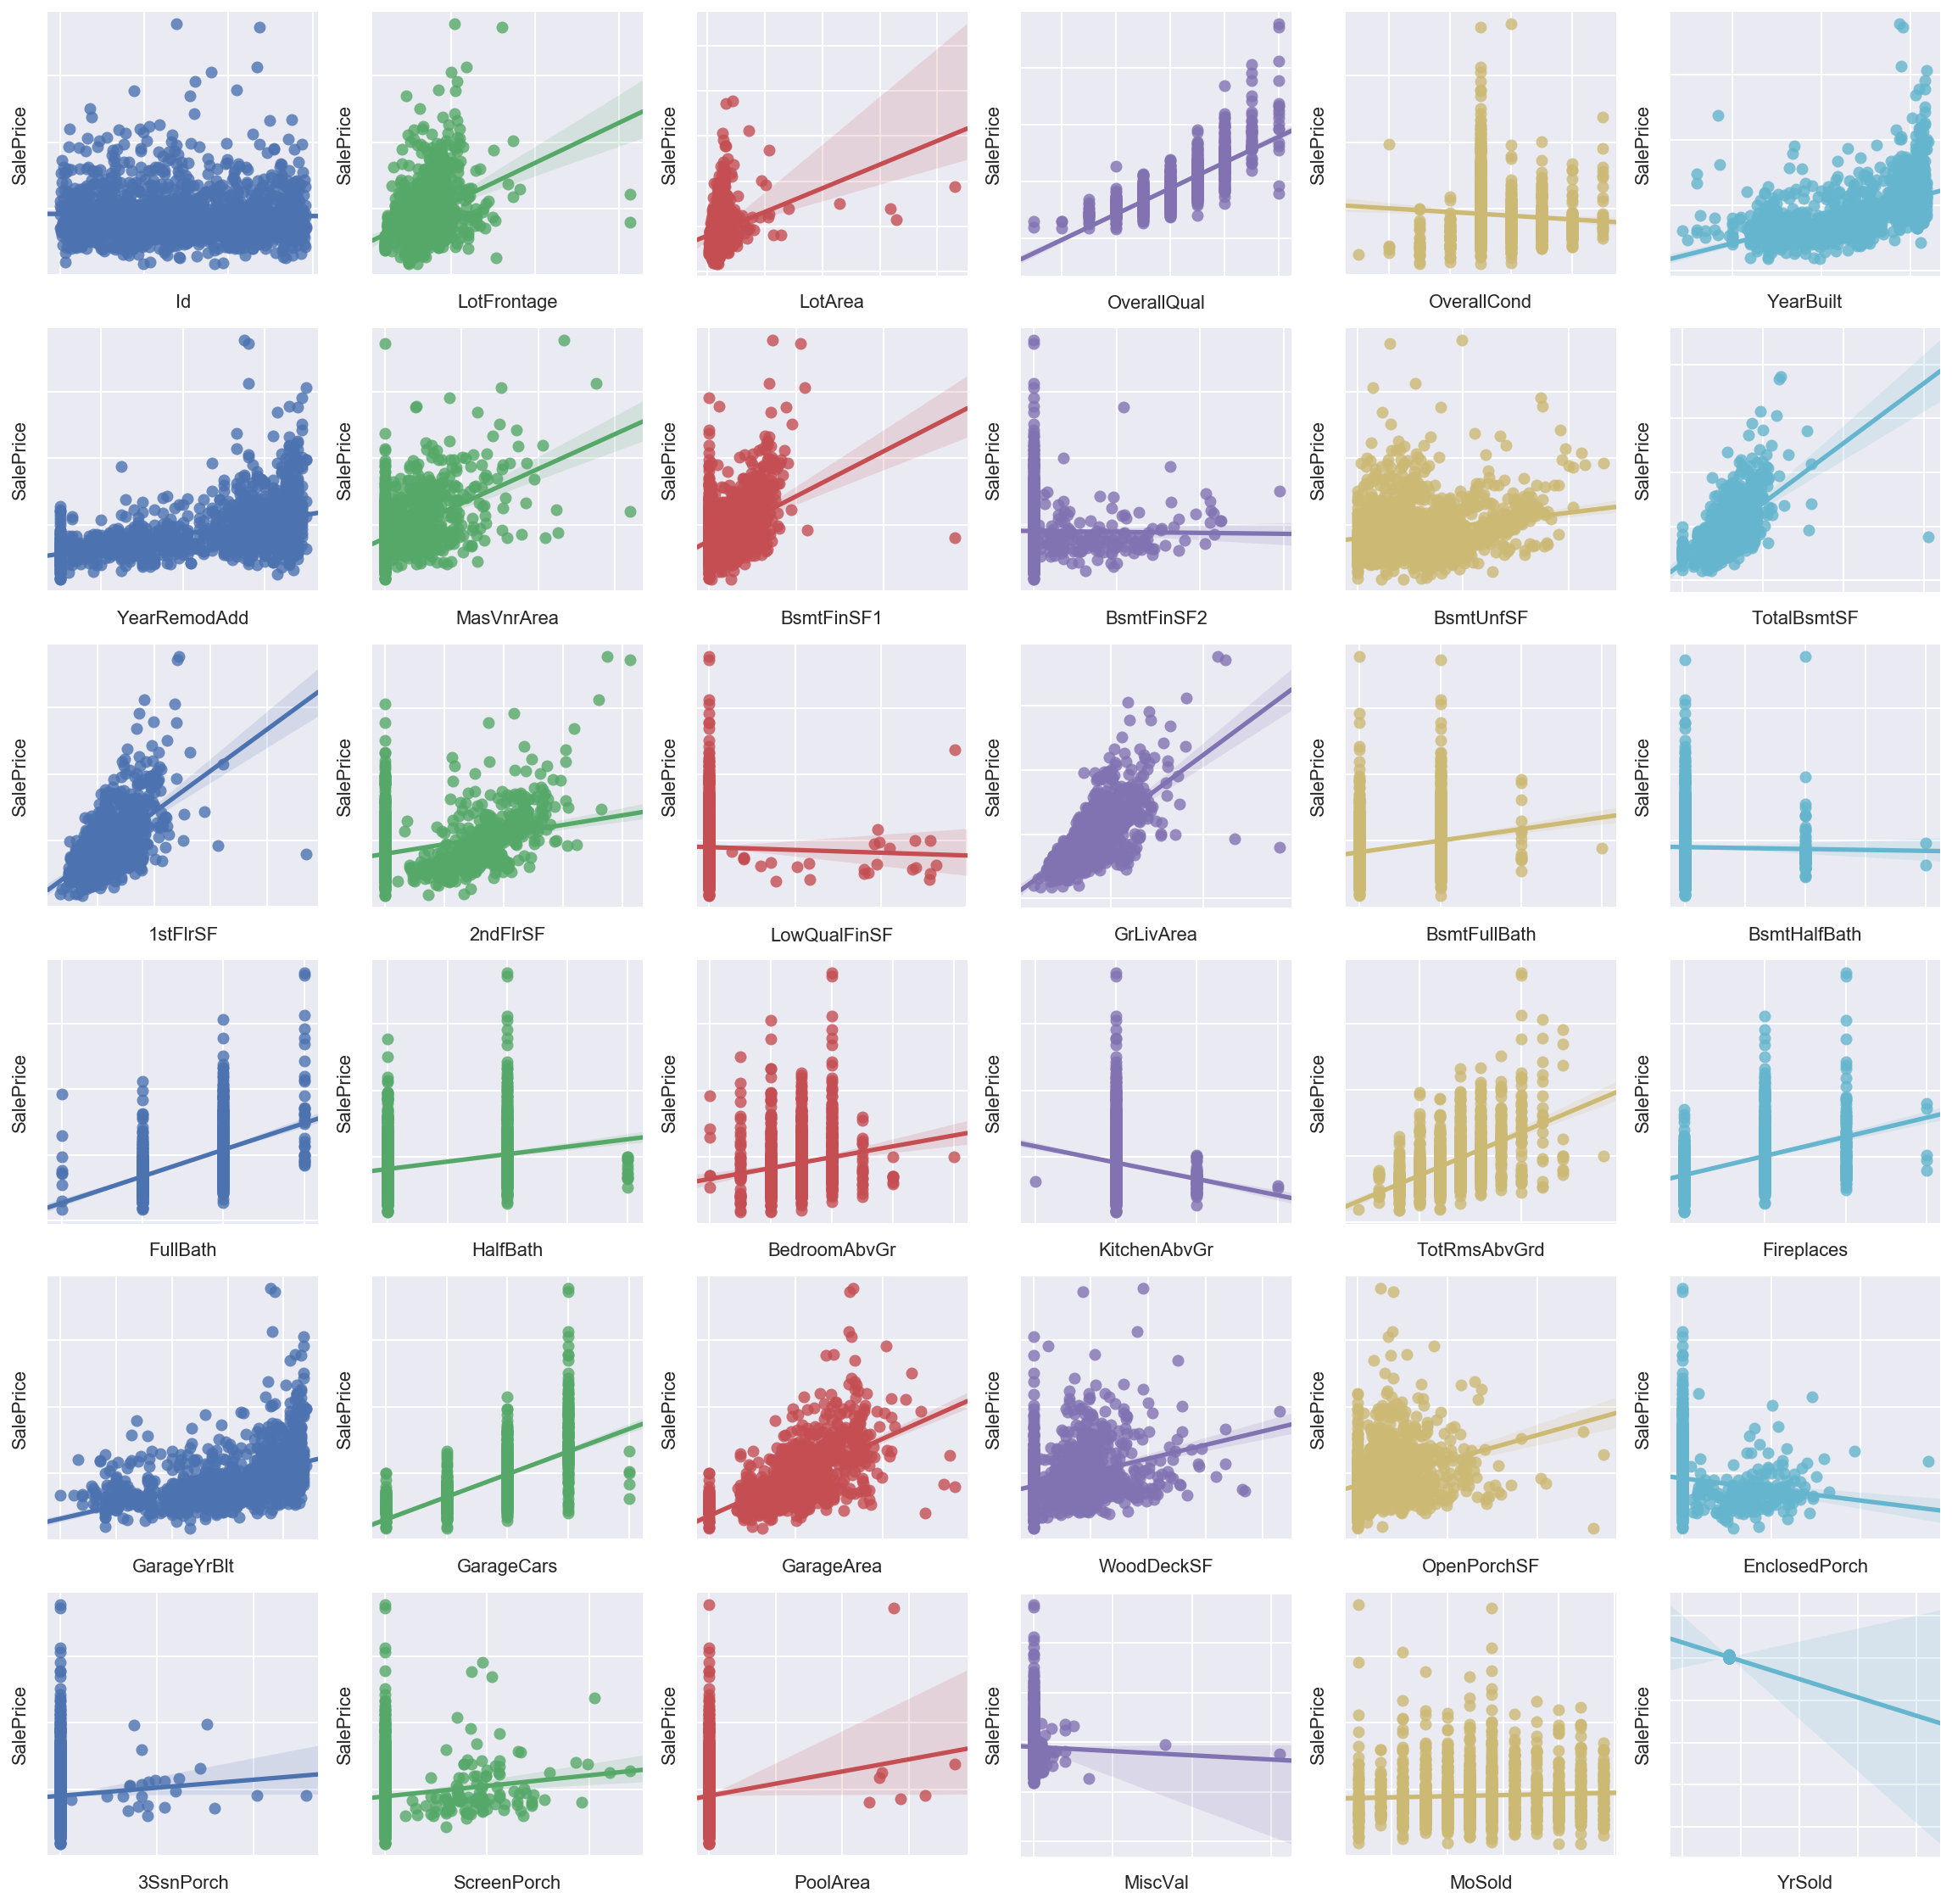

In [9]:
fig, ax = plt.subplots(6,6, figsize = (20,20))

for idx, n in enumerate(numerical_features):
    if n == 'SalePrice':
        continue
    sns.regplot(x=n, y='SalePrice', data=train, ax = ax[idx//6,idx%6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    ax[idx//6, idx % 6].set(xticklabels=[])
    
    continue   

#### (3) Graph for categorical features with  SalePrice

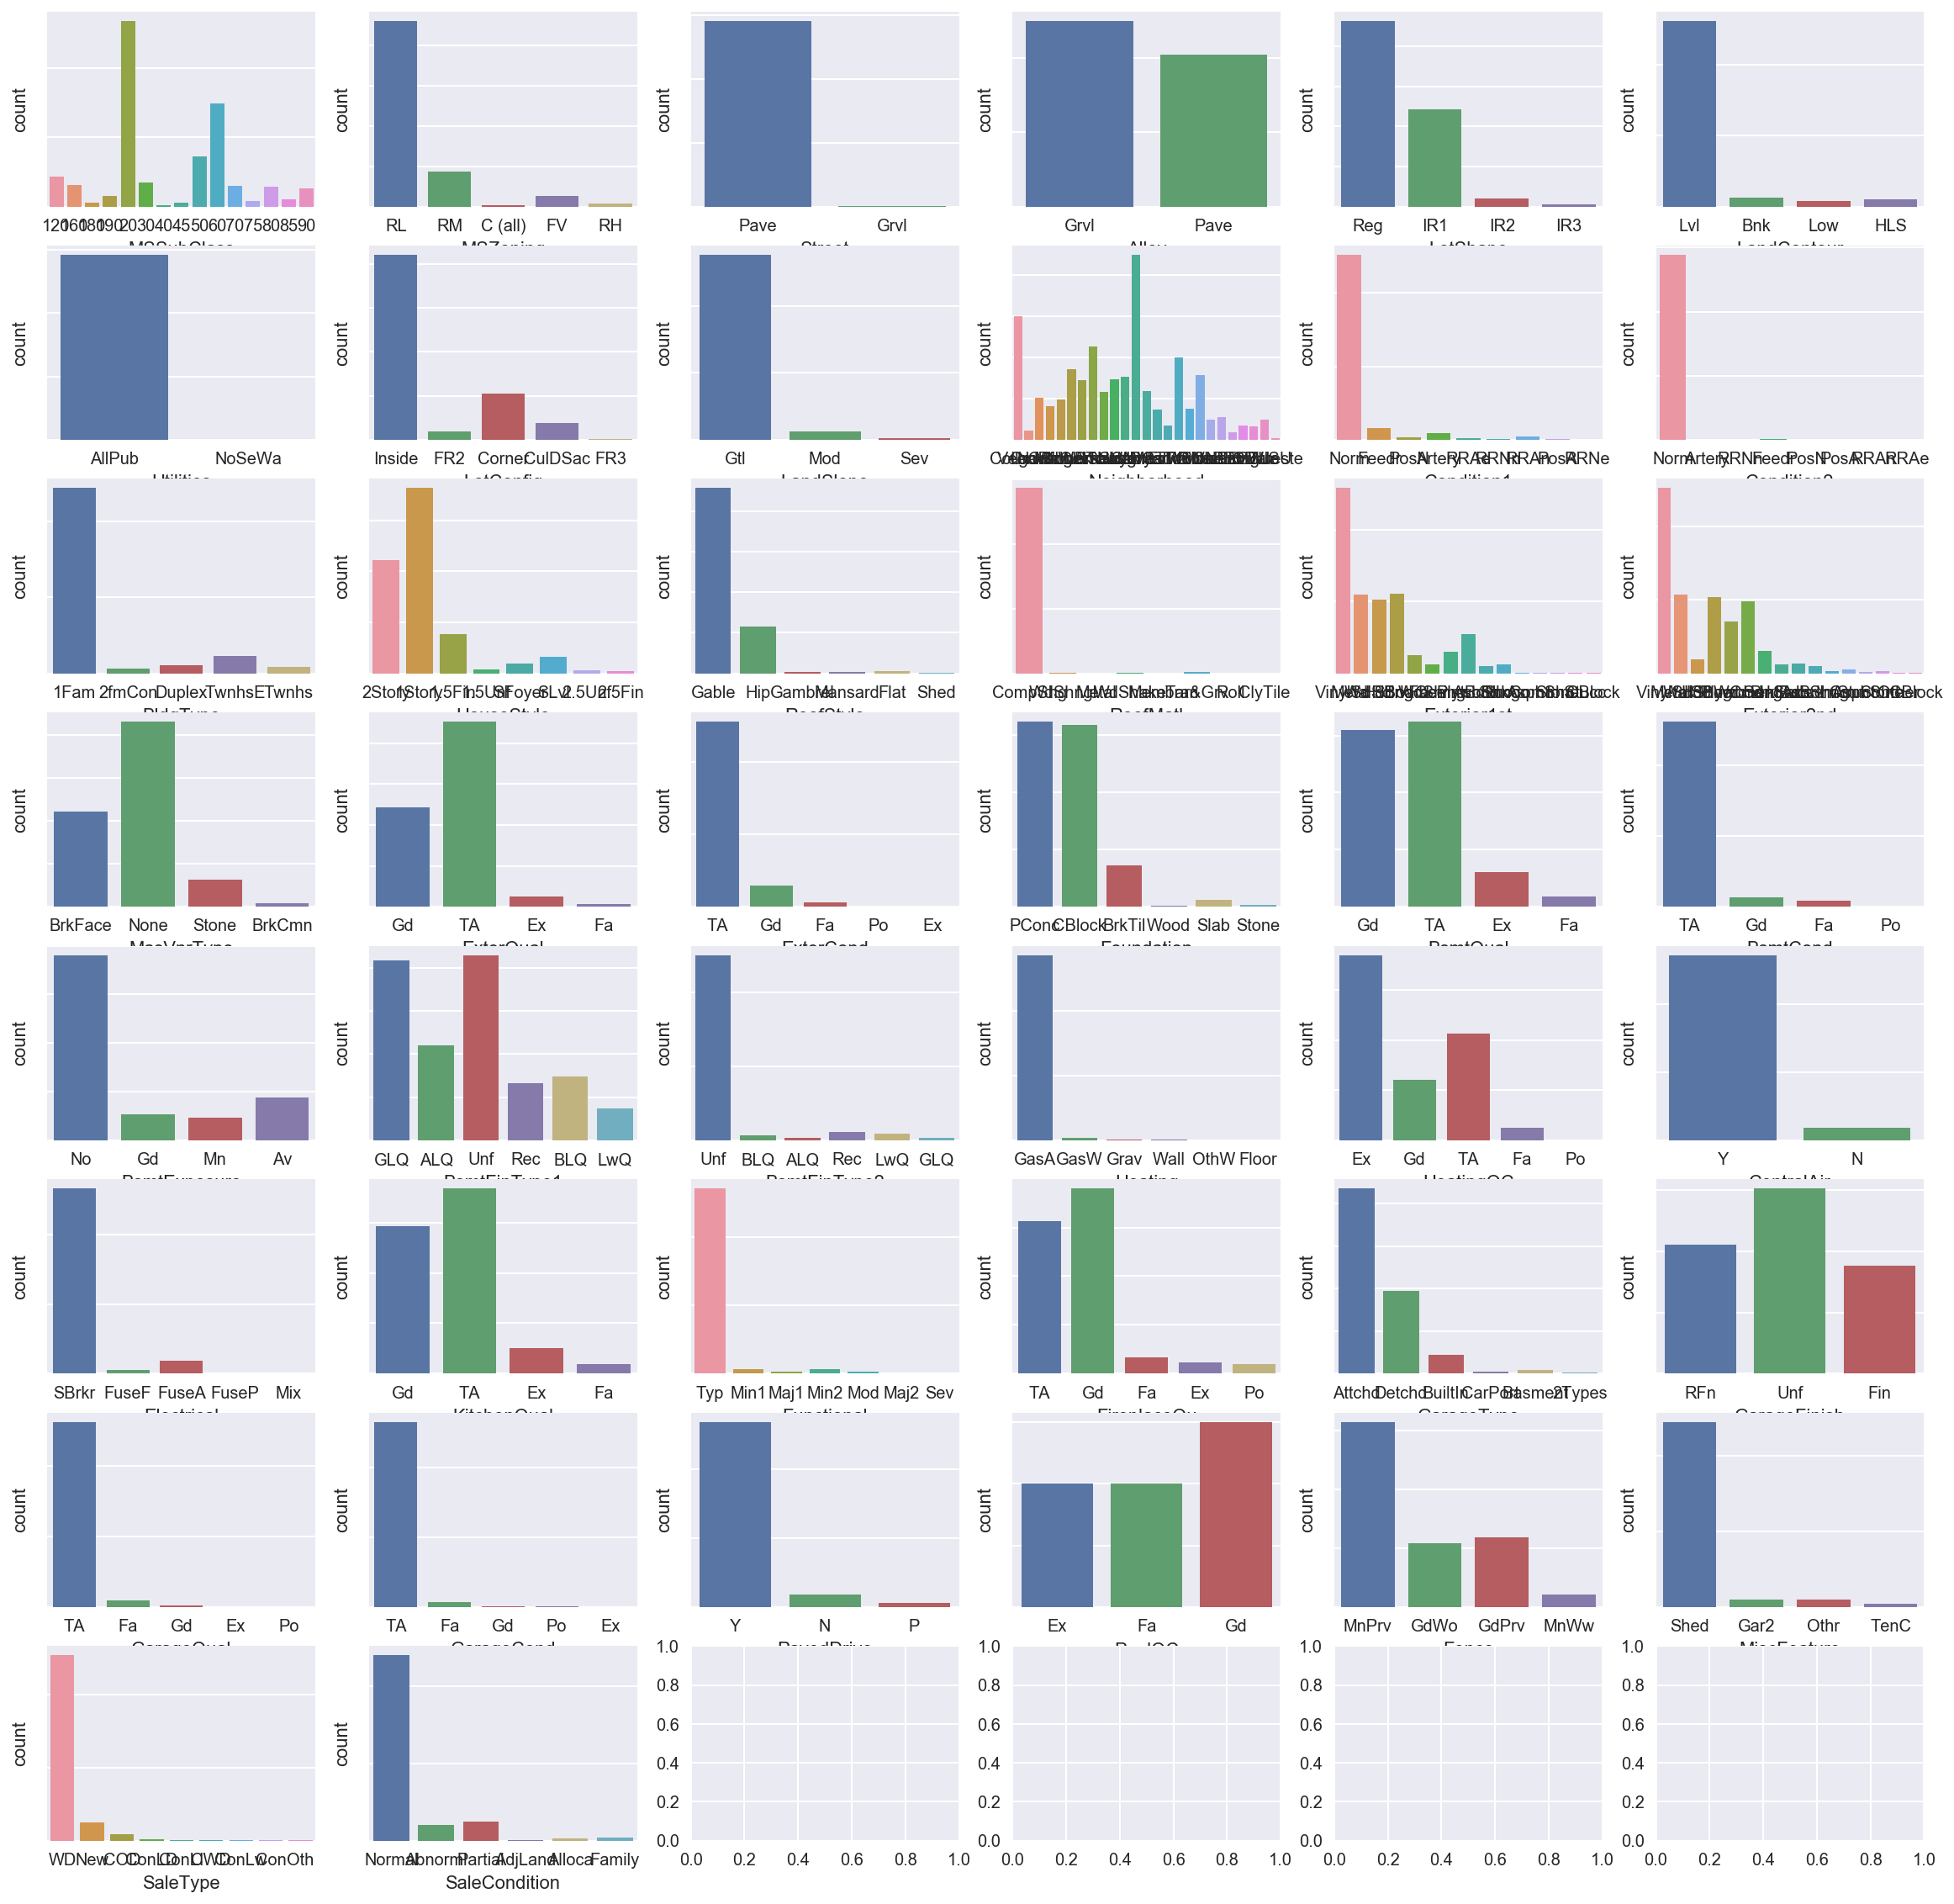

In [10]:
fig, ax = plt.subplots(8,6, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//6, idx % 6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    
    continue   

### 2-3 Relationship between SalePrice and variables

#### 2-3-1 Area

In [11]:
# Make df_train set to check 2ndFloor and Basement
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

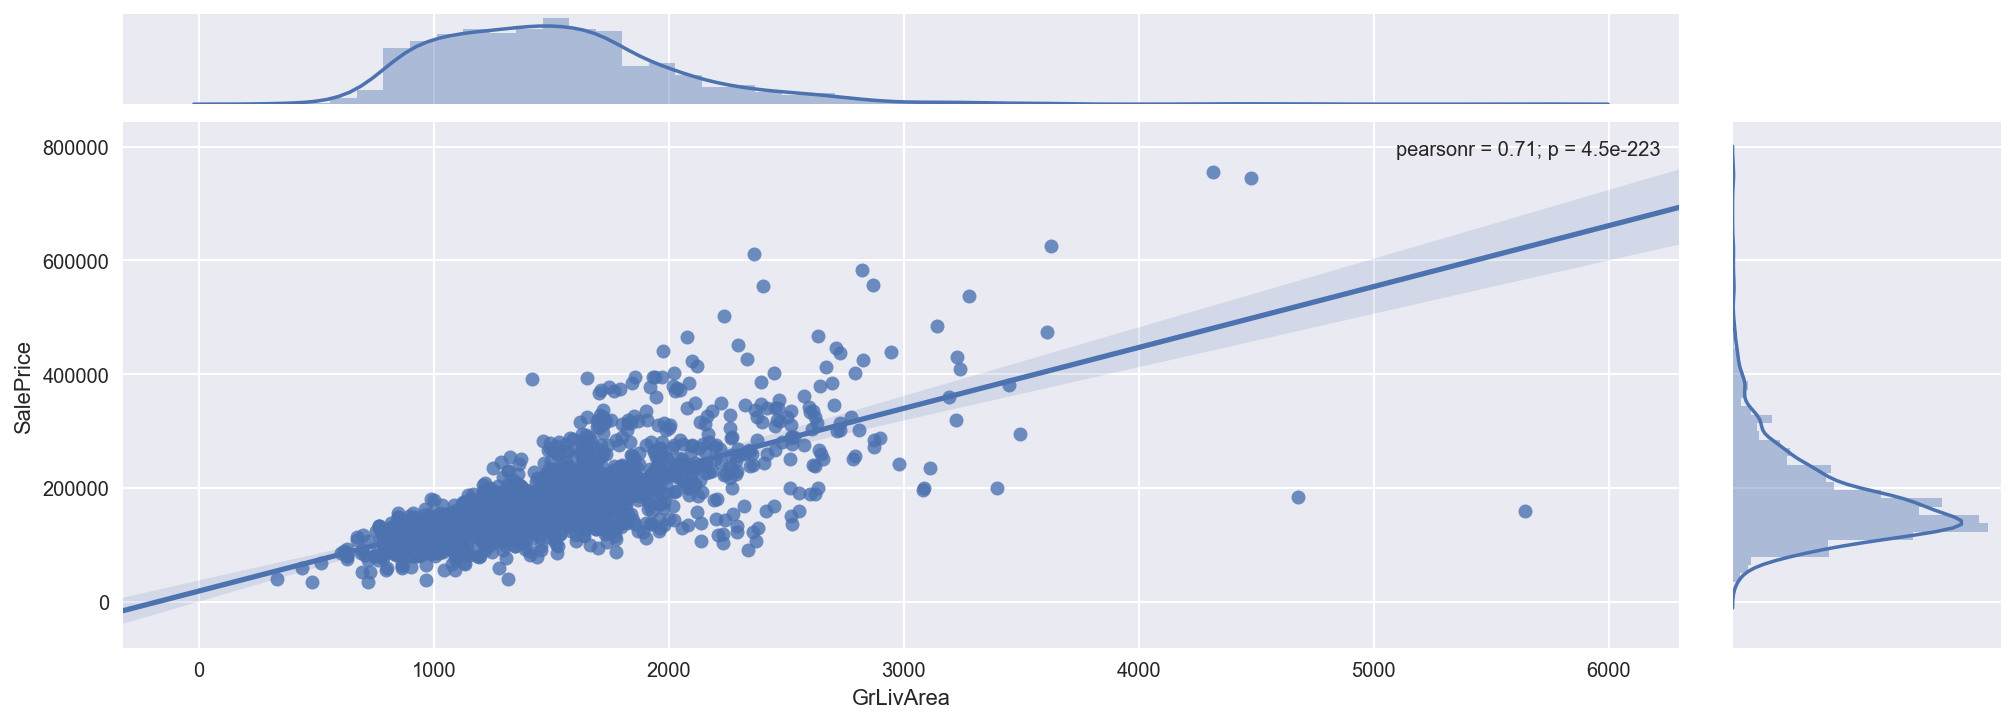

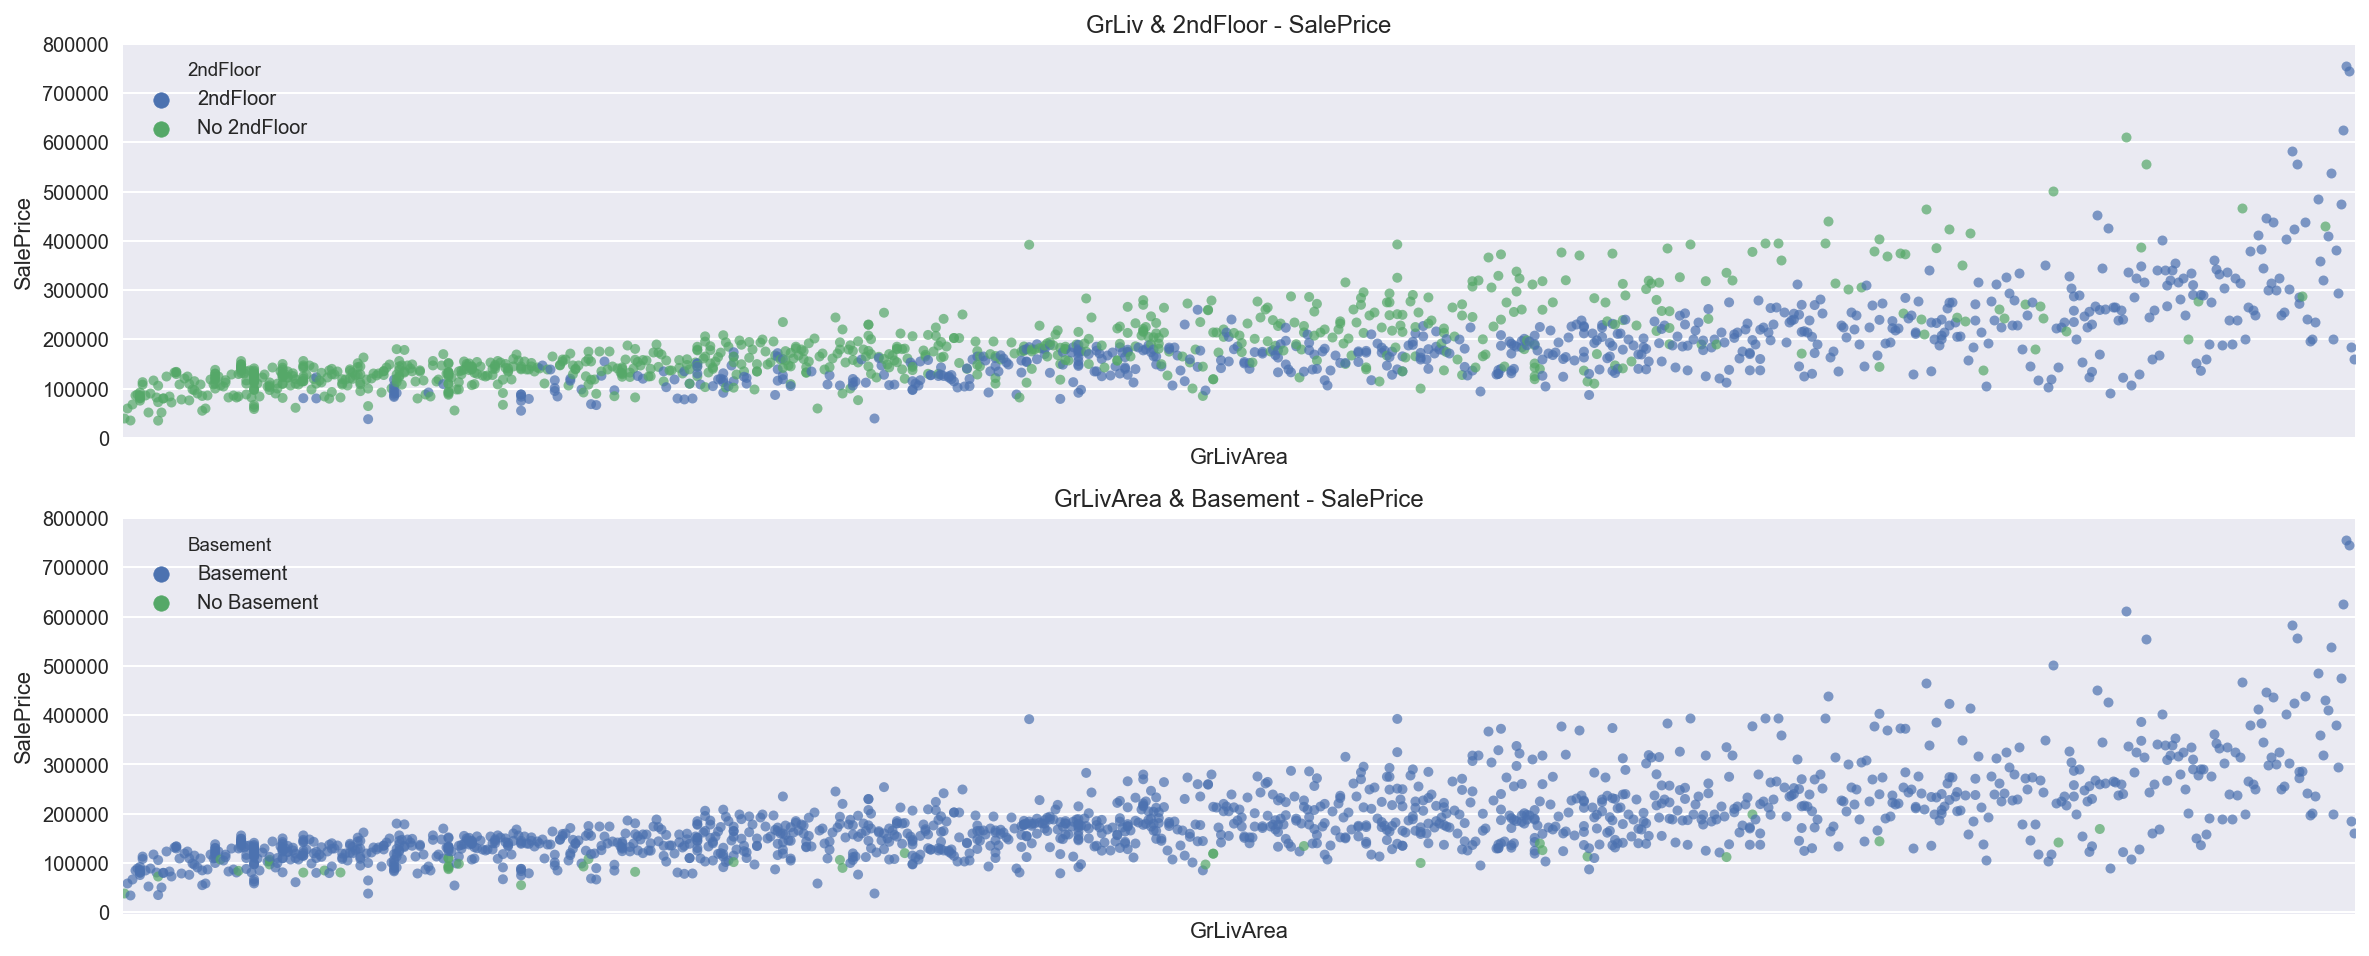

In [12]:
# Joint plot GrLivArea/saleprice
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

# Strip plot GrLivArea/2ndFloor/saleprice
plt.figure(figsize = (20,8))
plt.subplot(211)
g = sns.stripplot(x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_xticks([])
g.set_title('GrLiv & 2ndFloor - SalePrice')

# Strip plot GrLivArea/Basement/saleprice
plt.subplot(212)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_title('GrLivArea & Basement - SalePrice')
b.set_xticks([])

plt.show()

#### Comments : 
1.GrLivArea is a linear relationship to house values and is heterogeneous.

2.If the house price is above $ 200,000, there are more houses on the second floor and a few houses without basement

#### 2-3-2 Overall

Text(0.5,1,'OverallCond - SalePrice')

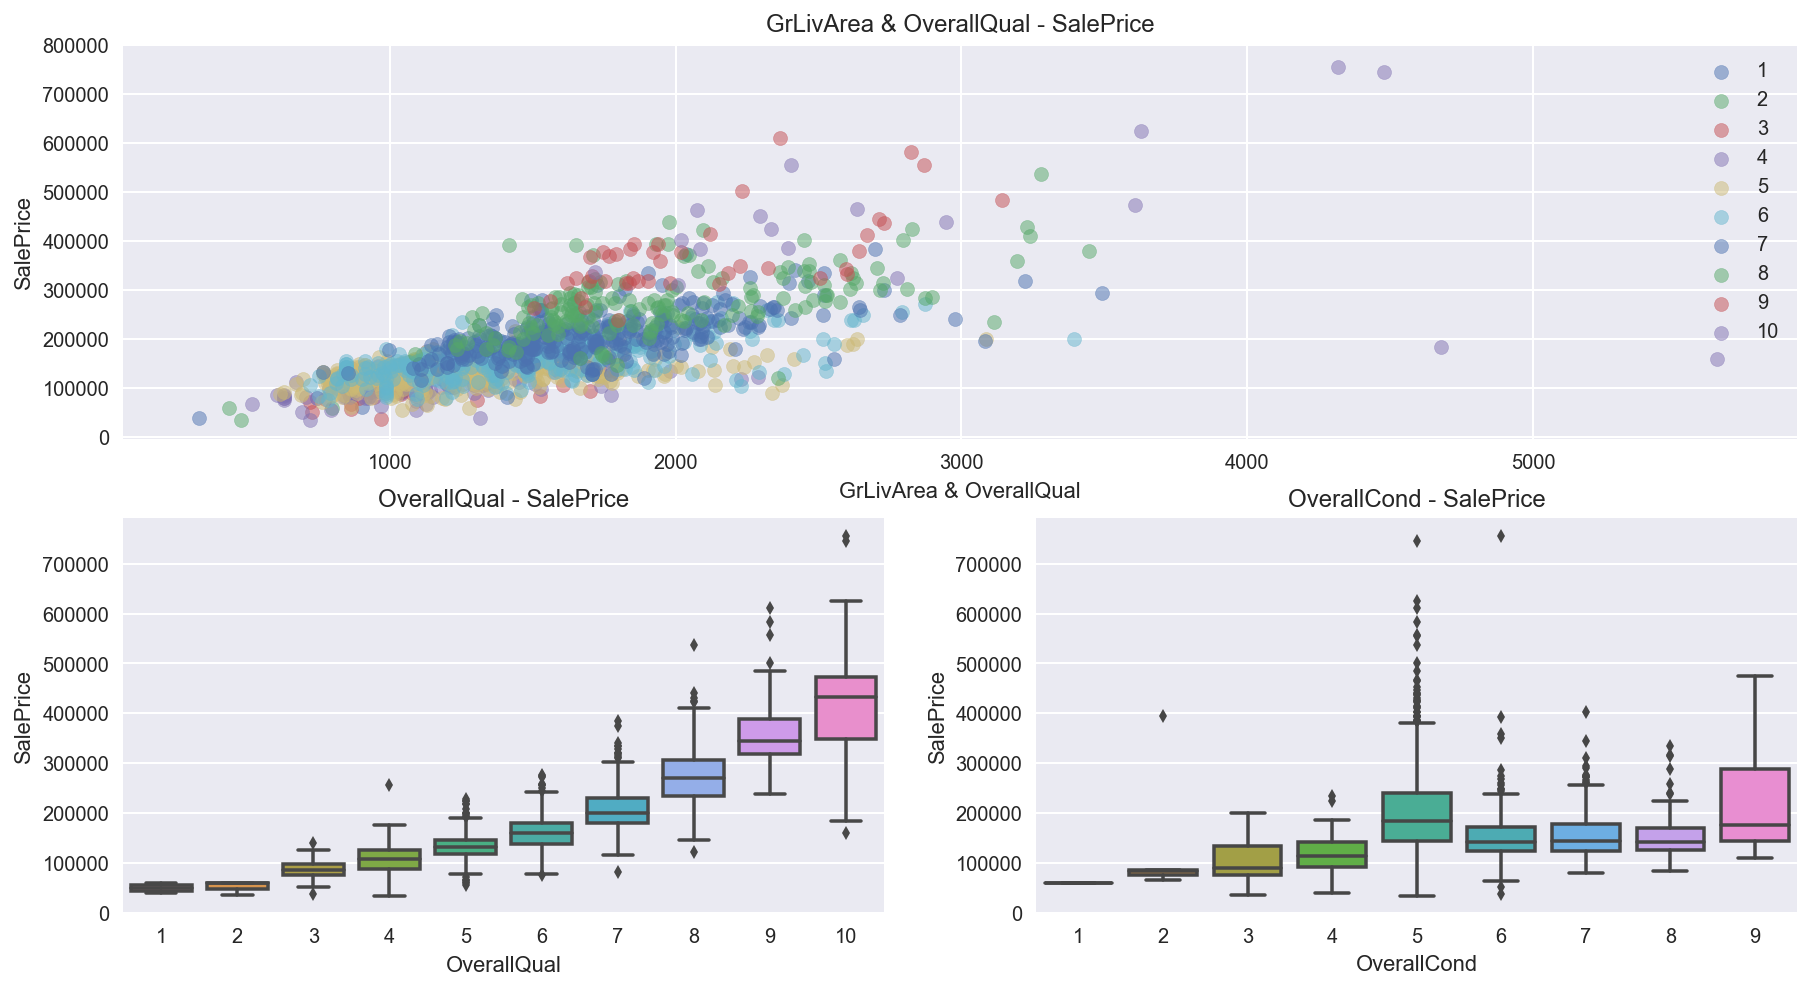

In [13]:
# Graph for GrLivArea & OverallQual - SalePrice
plt.figure(figsize=(15,8))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,11):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")
ax1.set_xlabel('GrLivArea & OverallQual')
ax1.set_ylabel('SalePrice')

# Graph for OverallQual - SalePrice
ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

# Graph for OverallCond - SalePrice
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

#### Comments :

1. 'OverallQual' seem to be related with 'SalePrice' and the box plot shows how sales prices increase with the overall quality. however, the 'OverallCond' seem to be not related.

#### 2-3-3 Garage

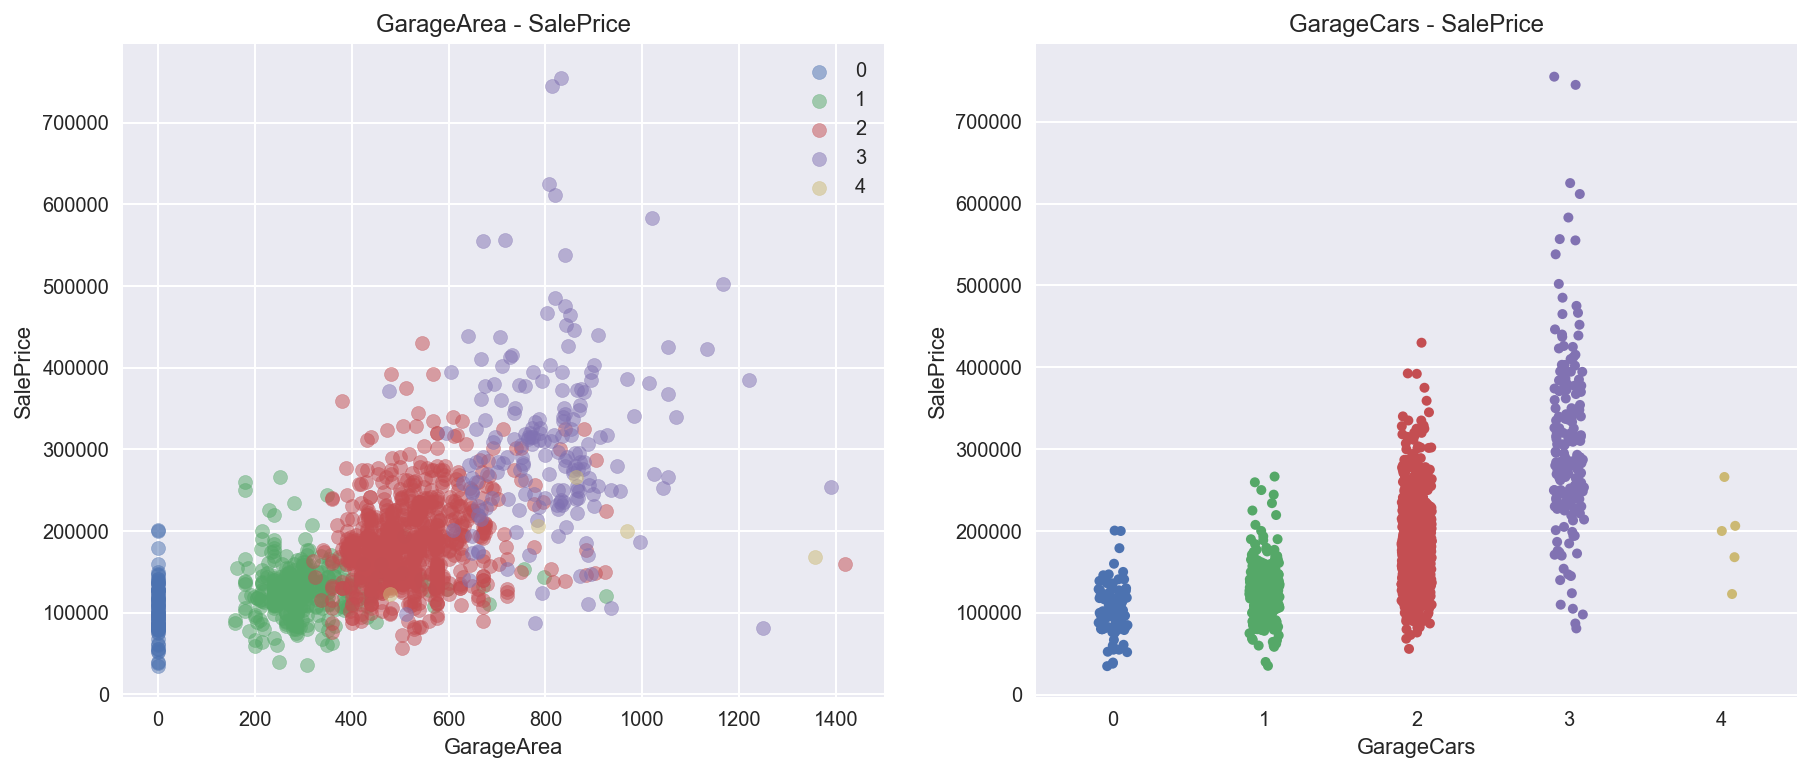

In [14]:
# Graph for GarageArea & GarageCars - SalePrice
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

# Graph for GarageArea 
ax1.legend()
ax1.set_title('GarageArea - SalePrice')
ax1.set_xlabel('GarageArea')
ax1.set_ylabel('SalePrice')

# Graph for GarageCars
ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

#### Comments:
1. The wider the GarageArea and the larger the number of cars (GarageCars), it can be seen that the higher the house price

#### 2-3-4 Neighborhood

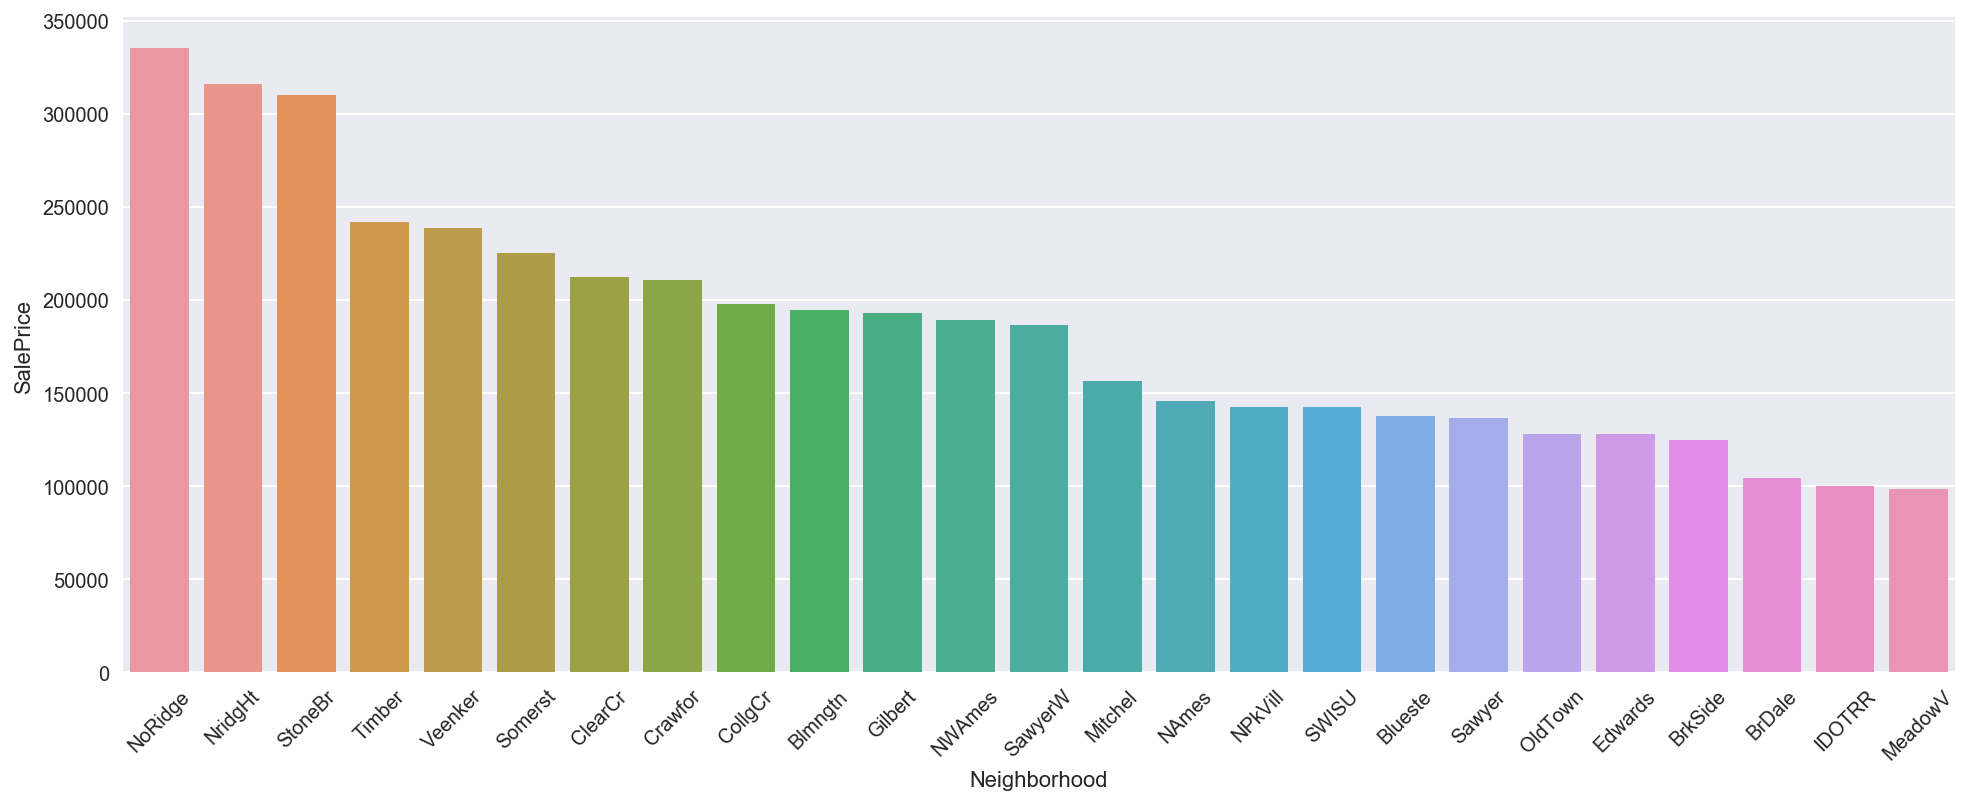

In [15]:
# Neighborhood variables are grouped by neighbors and then aggregated by average
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

# The bar graph displays the aggregated data in the order of the highest to lowest price
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [16]:
# High_price_neighbor is the house value of more than 250,000, Middle_price_neighbor is the neighbor of 250,000 ~ 150,000, and Low_price_neighbor is the remaining neighbor
def neighbor_level(x):
    High_price_neighbor = ['NoRidge','NridgHt','StoneBr'] 
    Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
    Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']
    
    if str(x) in High_price_neighbor:
        return "high"
    elif str(x) in Middle_price_neighbor:
        return "middle"
    elif str(x) in Low_price_neighbor:
        return "low"
    
df_train["neighbor_level"] = df_train["Neighborhood"].apply(neighbor_level)

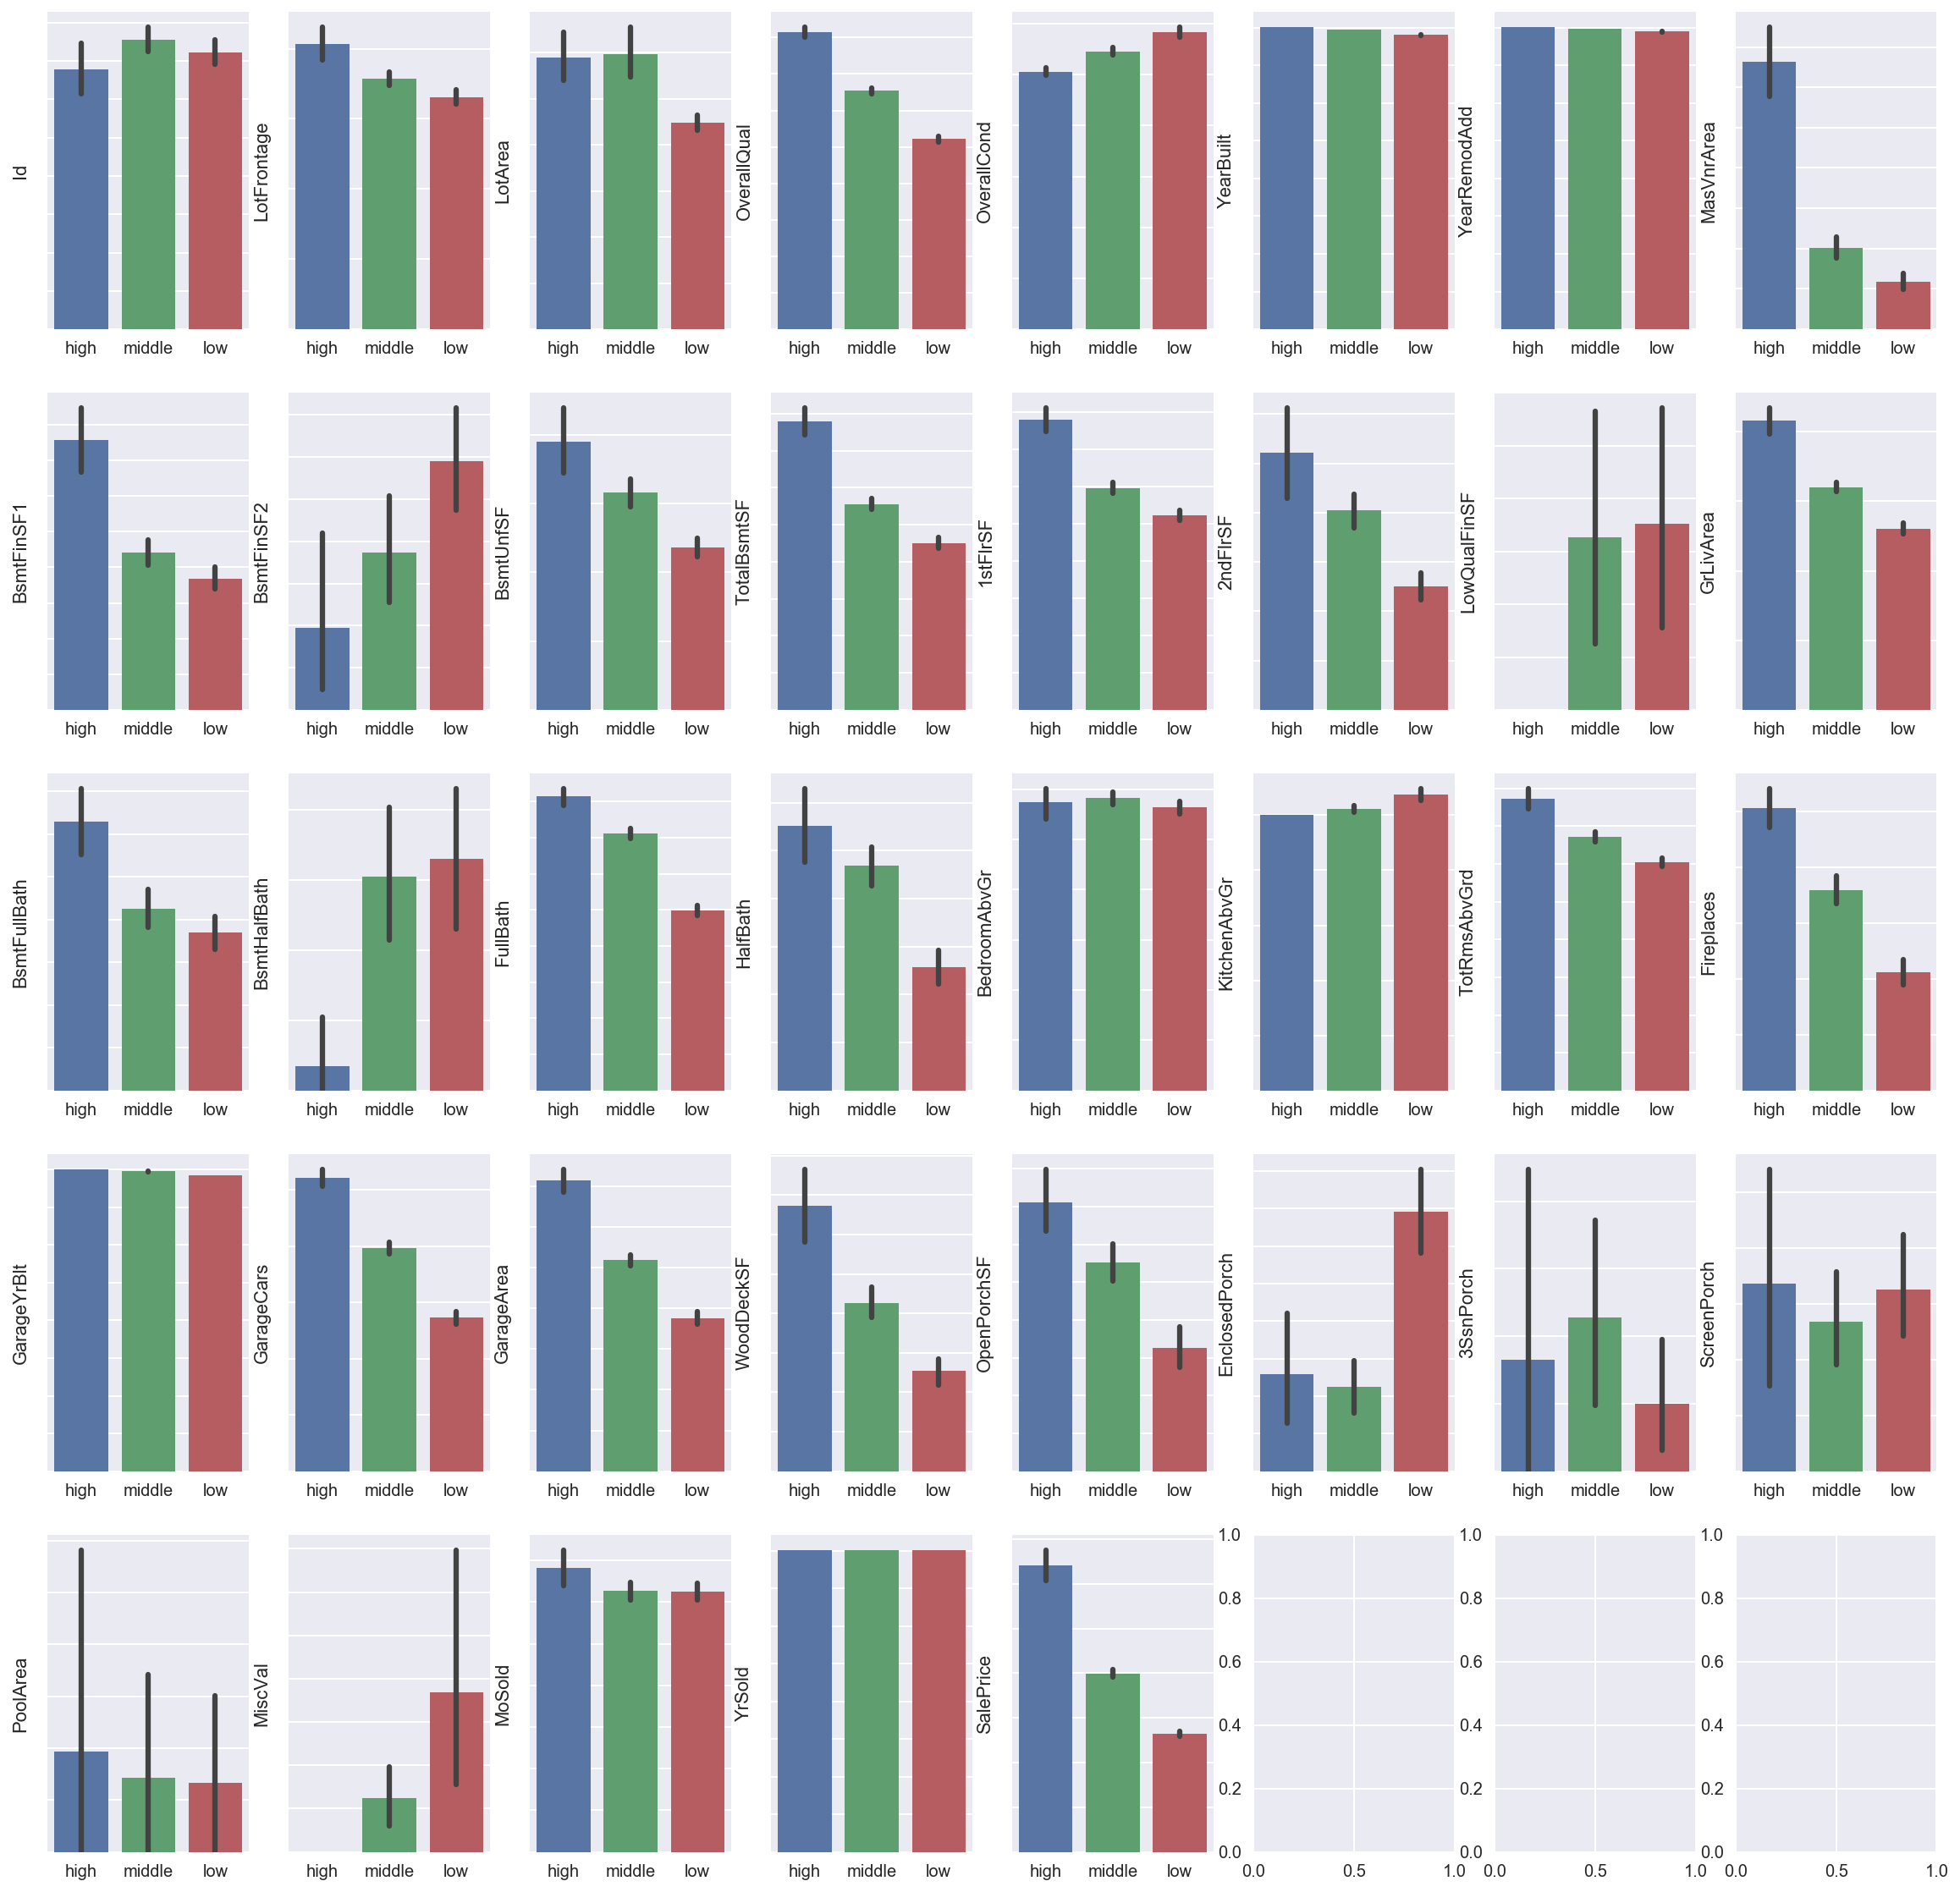

In [17]:
fig, ax = plt.subplots(5,8, figsize = (20,20))

for idx, n in enumerate(numerical_features):

    sns.barplot(x="neighbor_level", y= n, data=df_train, ax = ax[idx//8,idx%8], order=['high', 'middle', 'low'])
    ax[idx//8, idx % 8].set(yticklabels=[])
    ax[idx//8, idx % 8].set_xlabel("")
    ax[idx//8, idx % 8].set_ylabel(n)
    continue  

#### Comments:
1. High group's Overall quality (overall quality), GrLivArea (living room size), and GargeArea (garage width) are high on the average, which is an important factor in predicting house prices

#### 2-3-4 Year

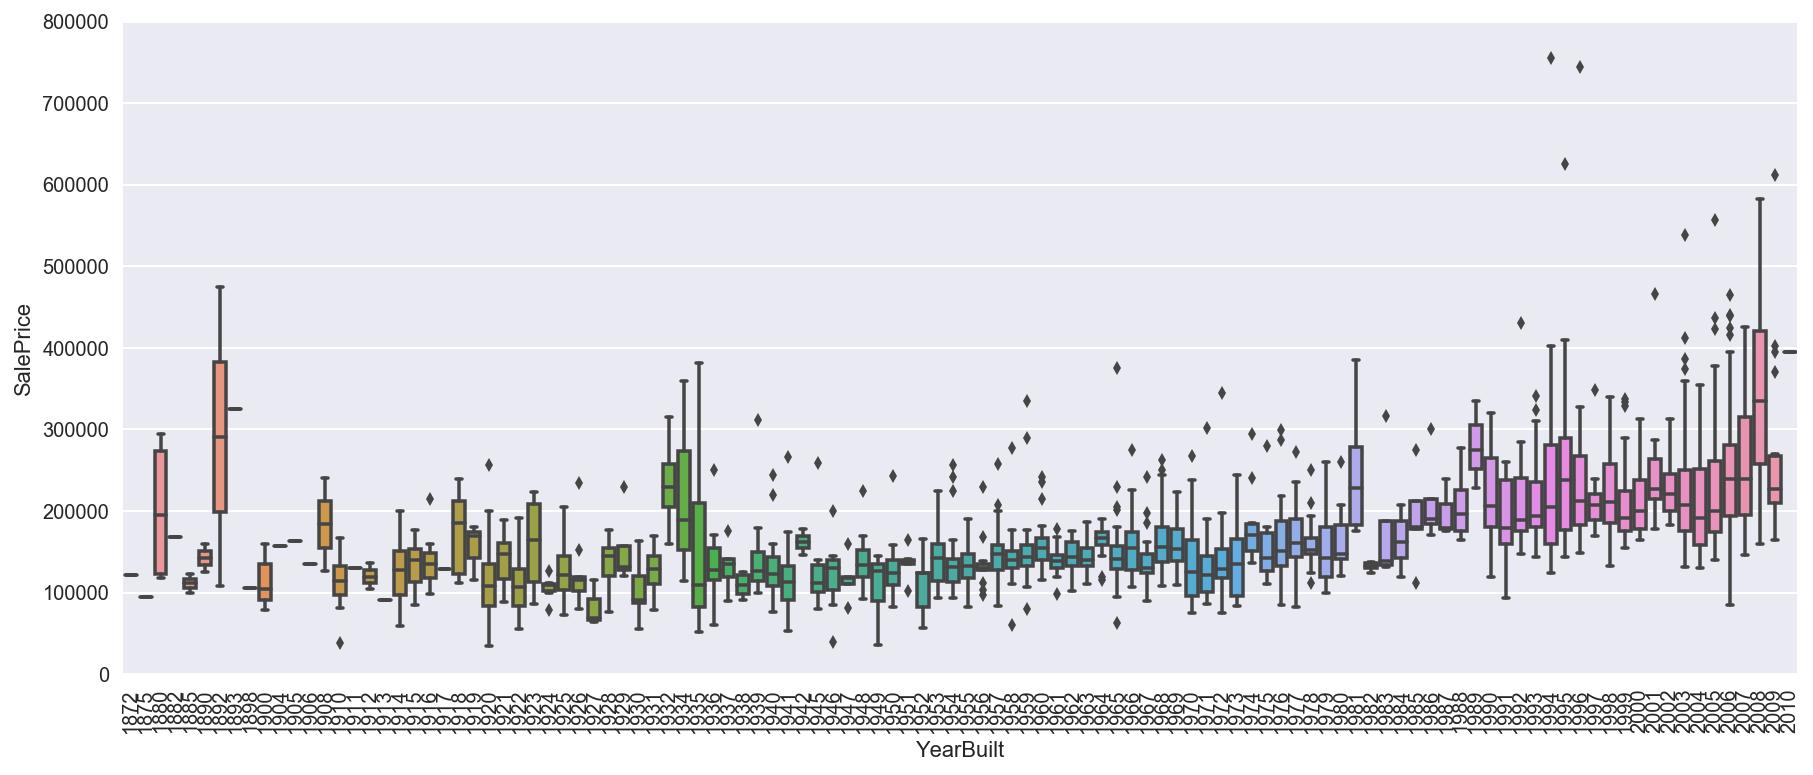

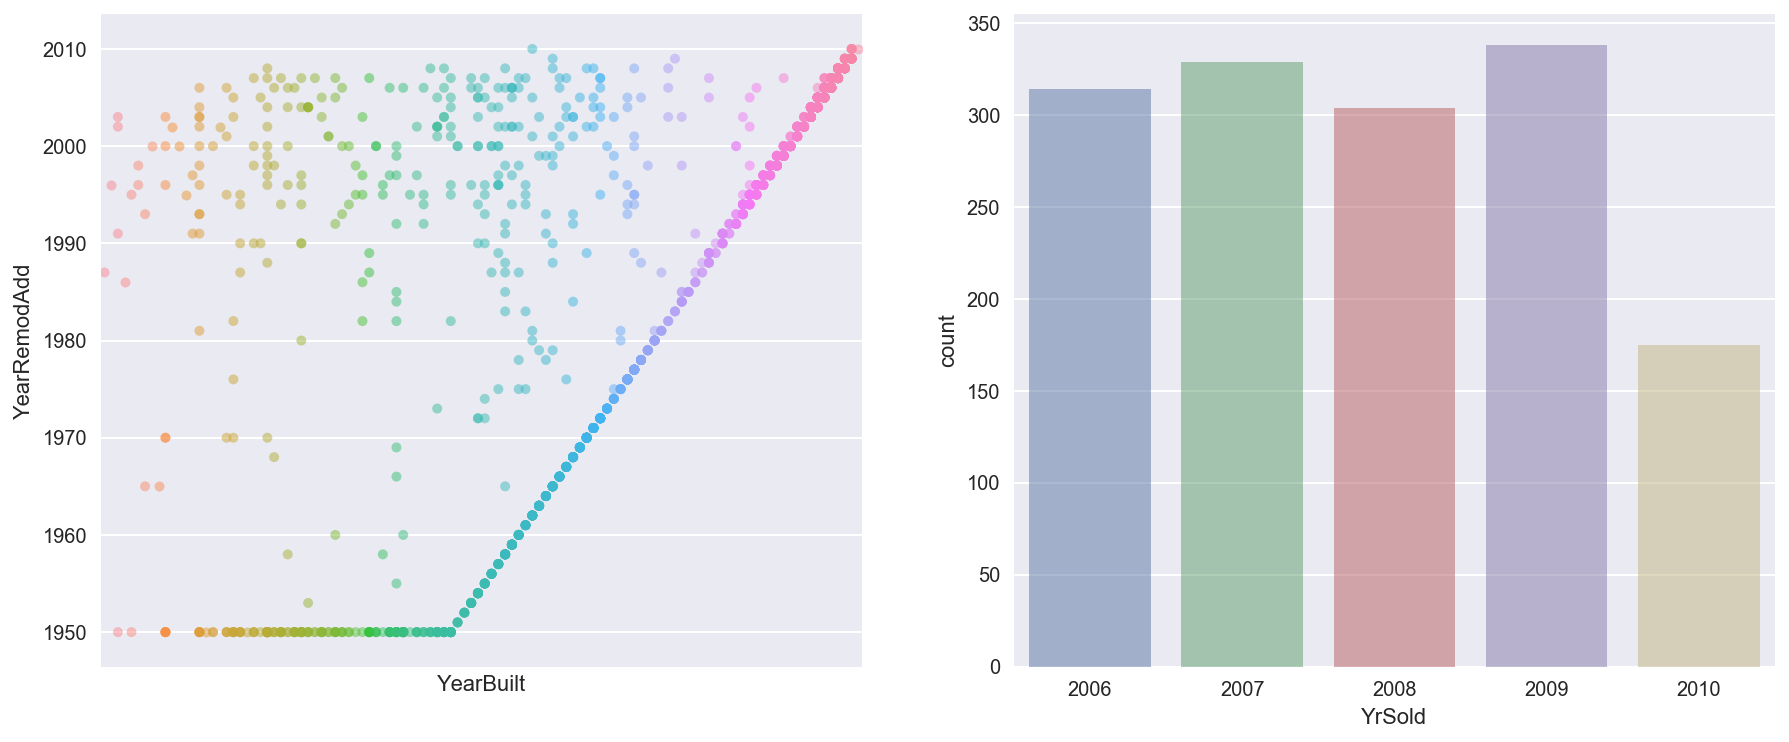

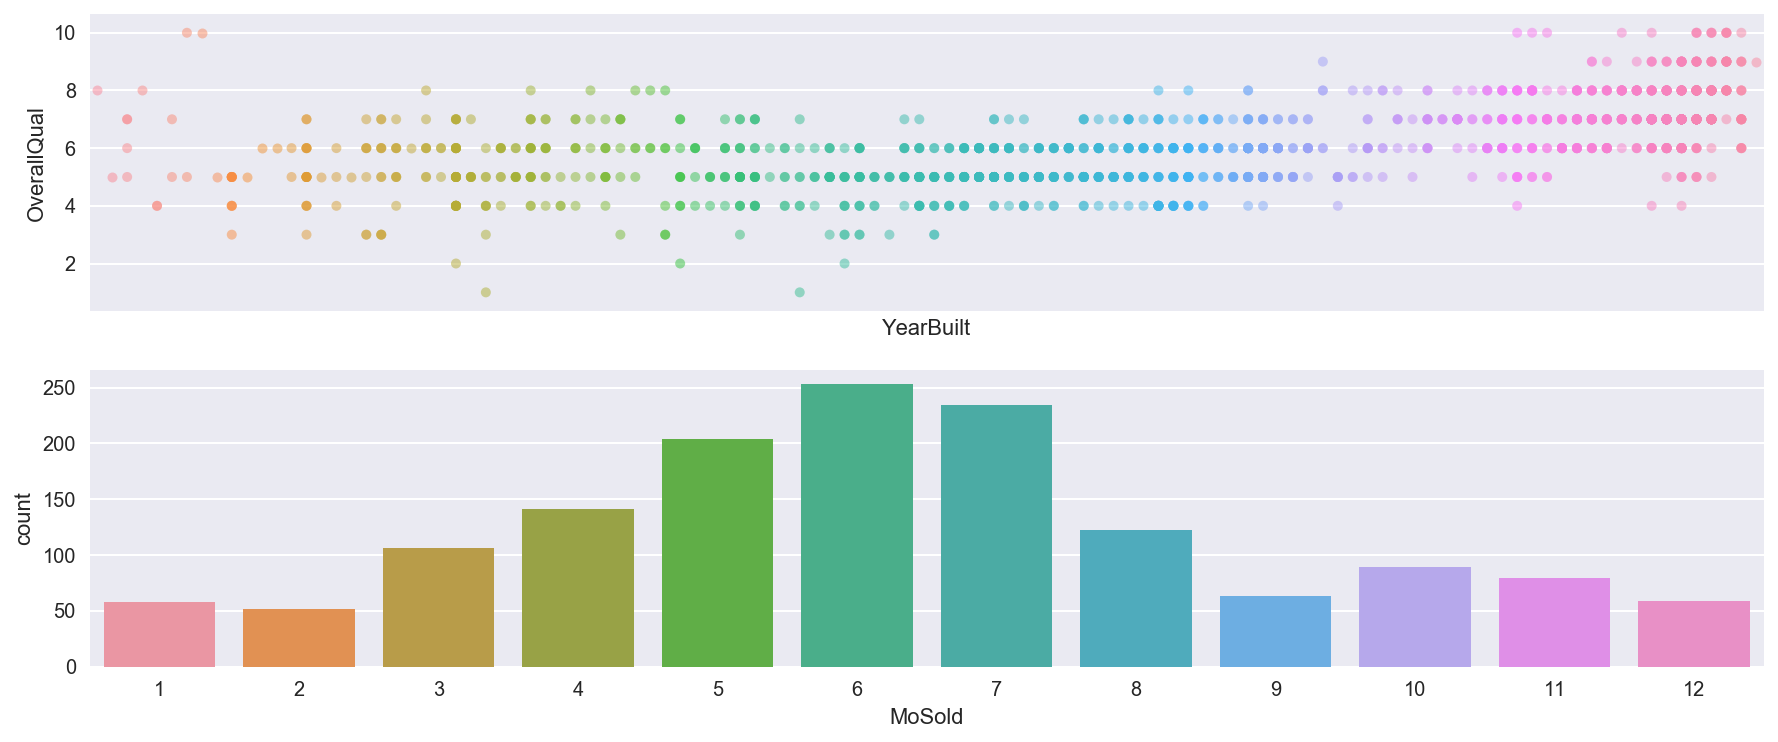

In [18]:
# Correlation between YearBuilt and SalePrice
# Boxplot YearBuilt / SalePrice
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

# Stripplot YearRemodAdd / YearBuilt
plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
sns.stripplot(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5,ax=ax2)
ax2.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')

# Countplot YrSold 
ax3 = plt.subplot(1,2,2)
sns.countplot(x = train['YrSold'], alpha = 0.5, ax=ax3)
plt.show()

# Stripplot YearBuilt / OverallQual
plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5,ax=ax4)

ax4.set_xticks([])
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')

# Countplot MoSold  
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

#### Comments :

1. The price of recently built house is high.
2. Houses that have not been remodeled are recorded in the same year as the year they were built.
3. Remodeling took place after 1950 and most of the old houses were remodeled in 1950.
4. The year of the sale is from 2006 to 2010, with the largest sale in 2009.
5. The most active trading takes place in May, June, and July.

### 2-3-5 Fireplaces

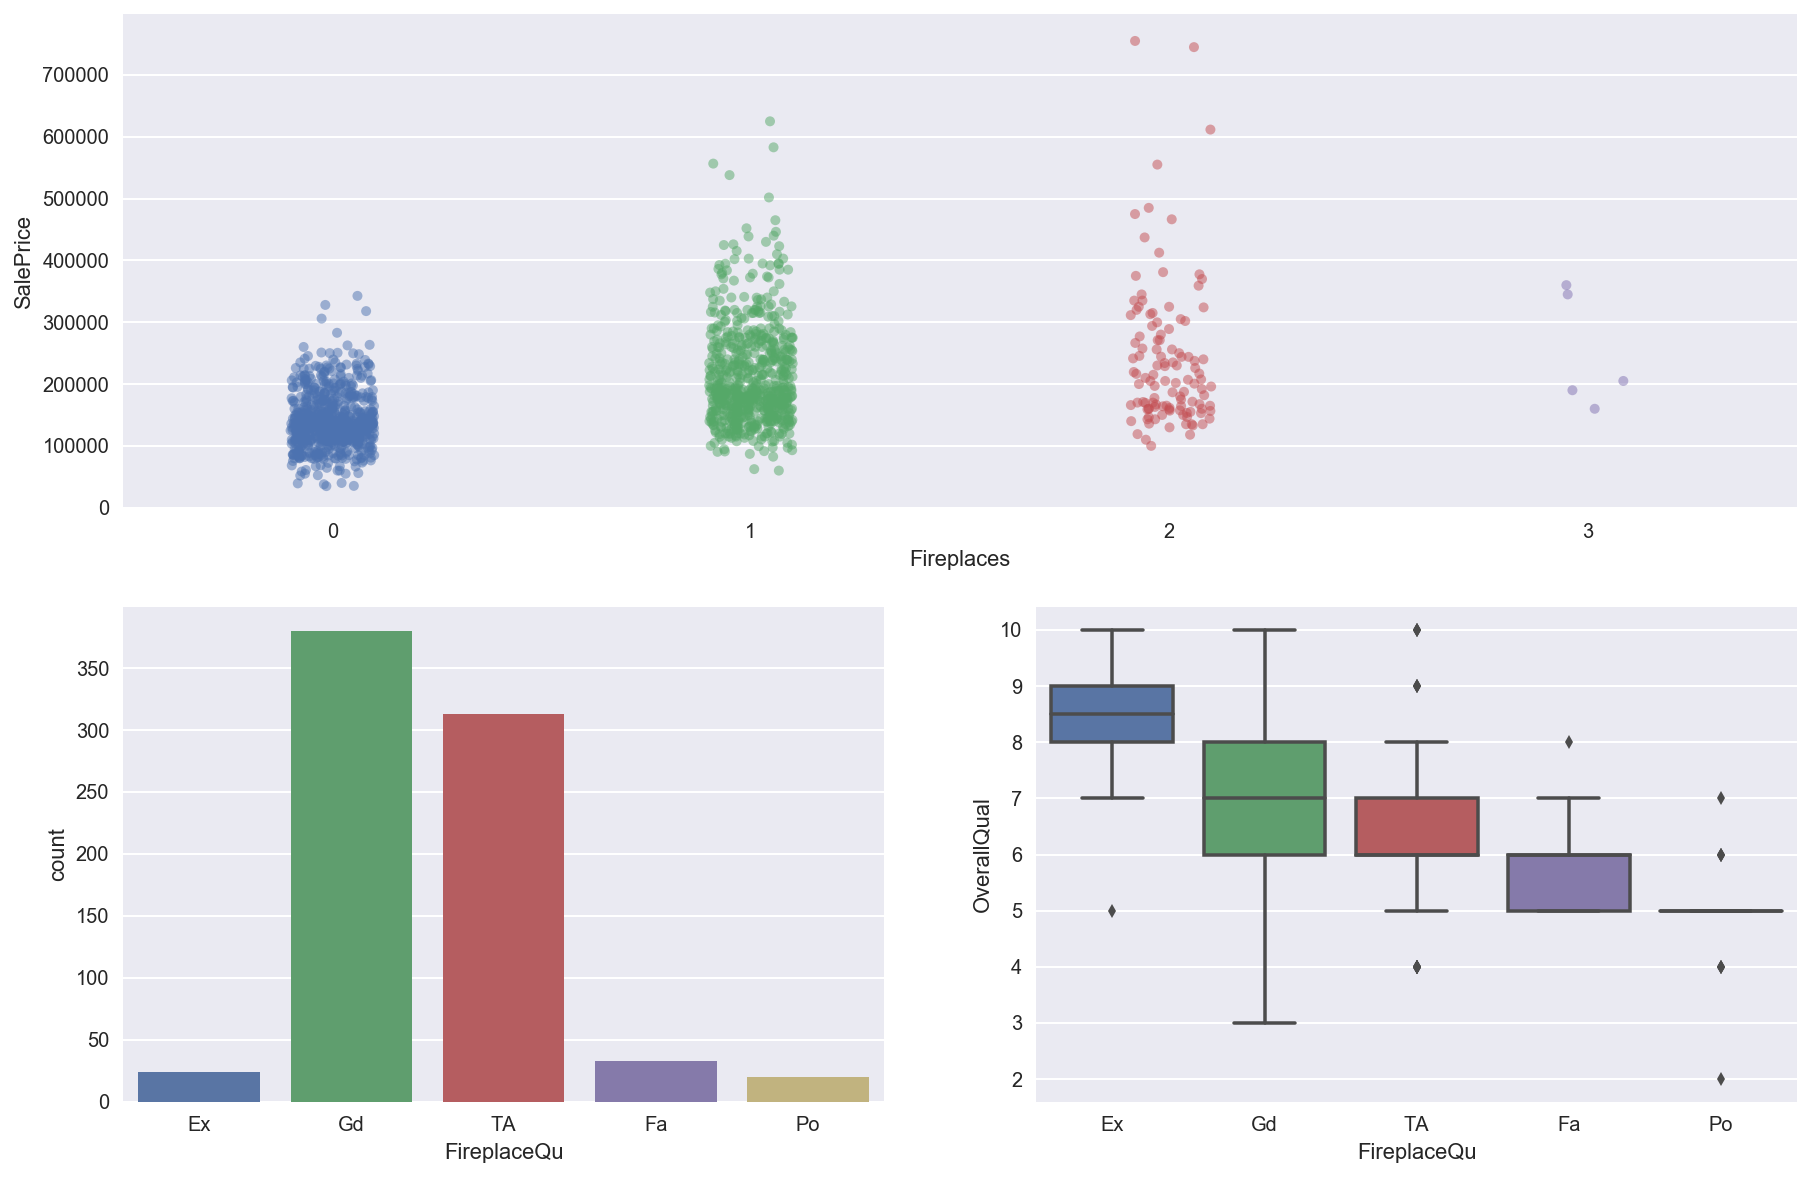

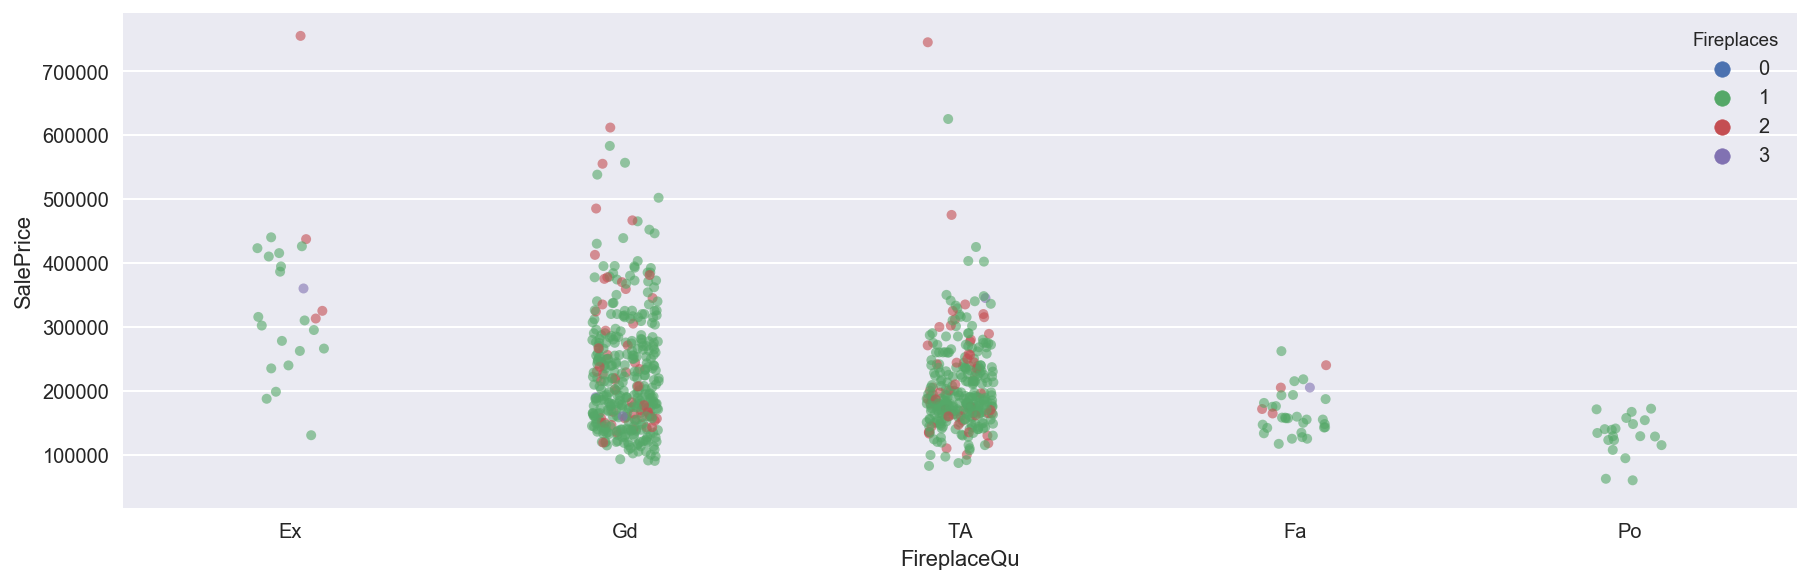

In [22]:
# Stripplot Fireplaces / SalePrice
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

# Countplot FireplaceQu 
ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'])

# Boxplot FireplaceQu / OverallQual
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ax=ax3)
plt.show()

# Stripplot FireplaceQu / Fireplaces / SalePrice
plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6,order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], ax=ax4)

plt.show()

#### Comments:

1. There is a price difference between a house with zero FirePlaces and a house with one FirePlaces.
2. FireplaceQu and OverallQual are closely related.
3. The lower the FireplaceQu, the lower the SalePrice

### 2-3-6 Basement Bath

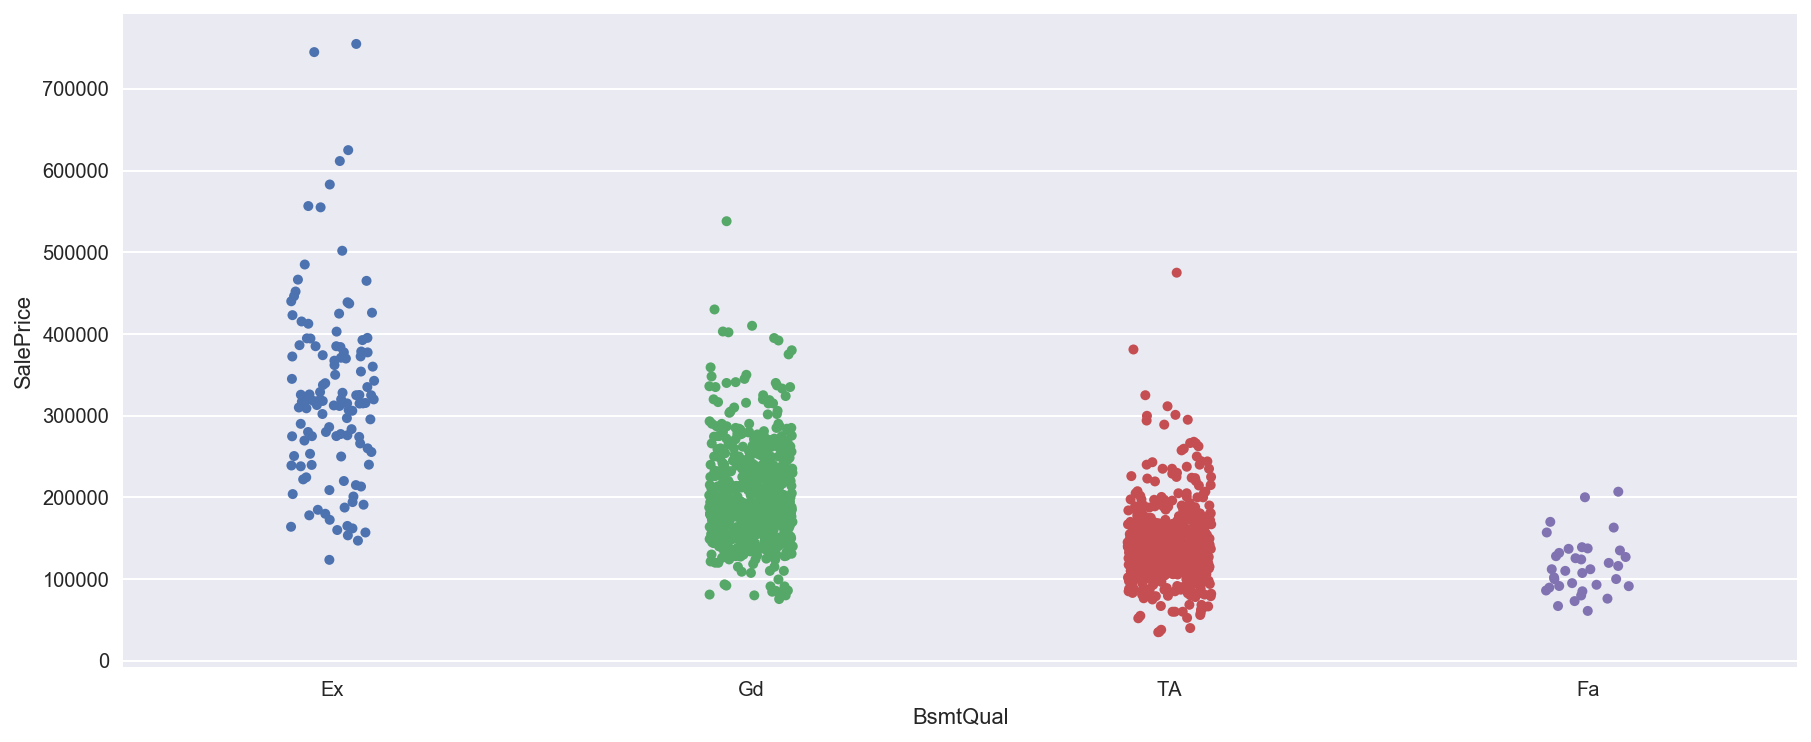

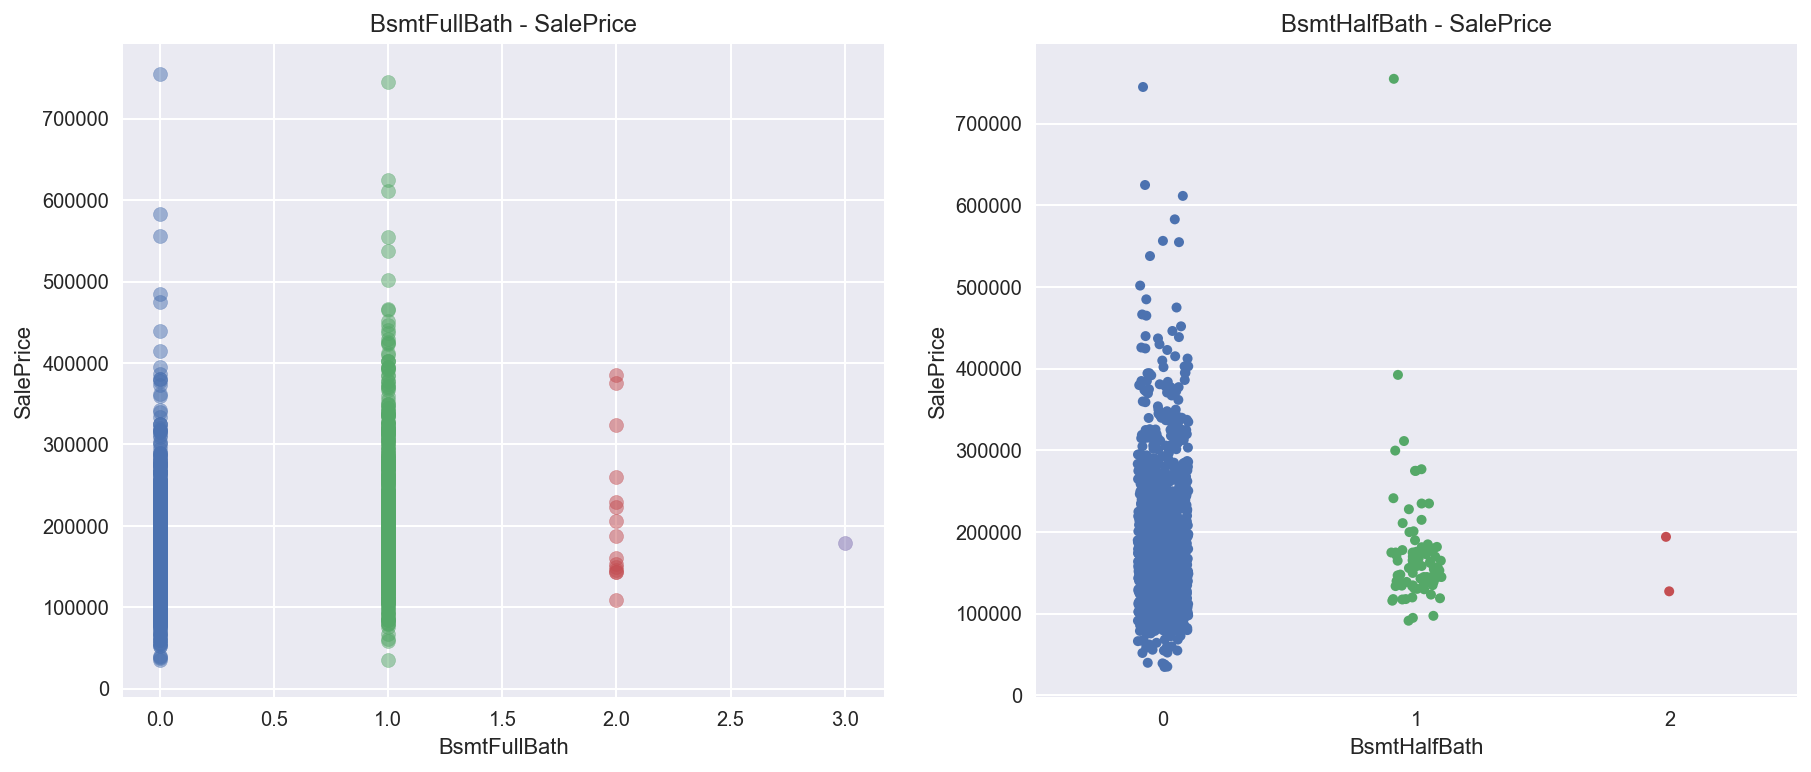

In [24]:
# Stripplot BsmtQual / SalePrice
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True,\
             order = ['Ex', 'Gd', 'TA', 'Fa'])

plt.figure(figsize=(15,6))

# Scatterplot BsmtFullBath
ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

# ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')
ax1.set_xlabel('BsmtFullBath')
ax1.set_ylabel('SalePrice')

# Stripplot BsmtHalfBath / SalePrice
ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')


plt.show()

#### Comment :
1. The higher the quality of the bathroom, the higher the house price.
2. In the case of HalfBath, the more the house price goes down

### 2-3-7 Room

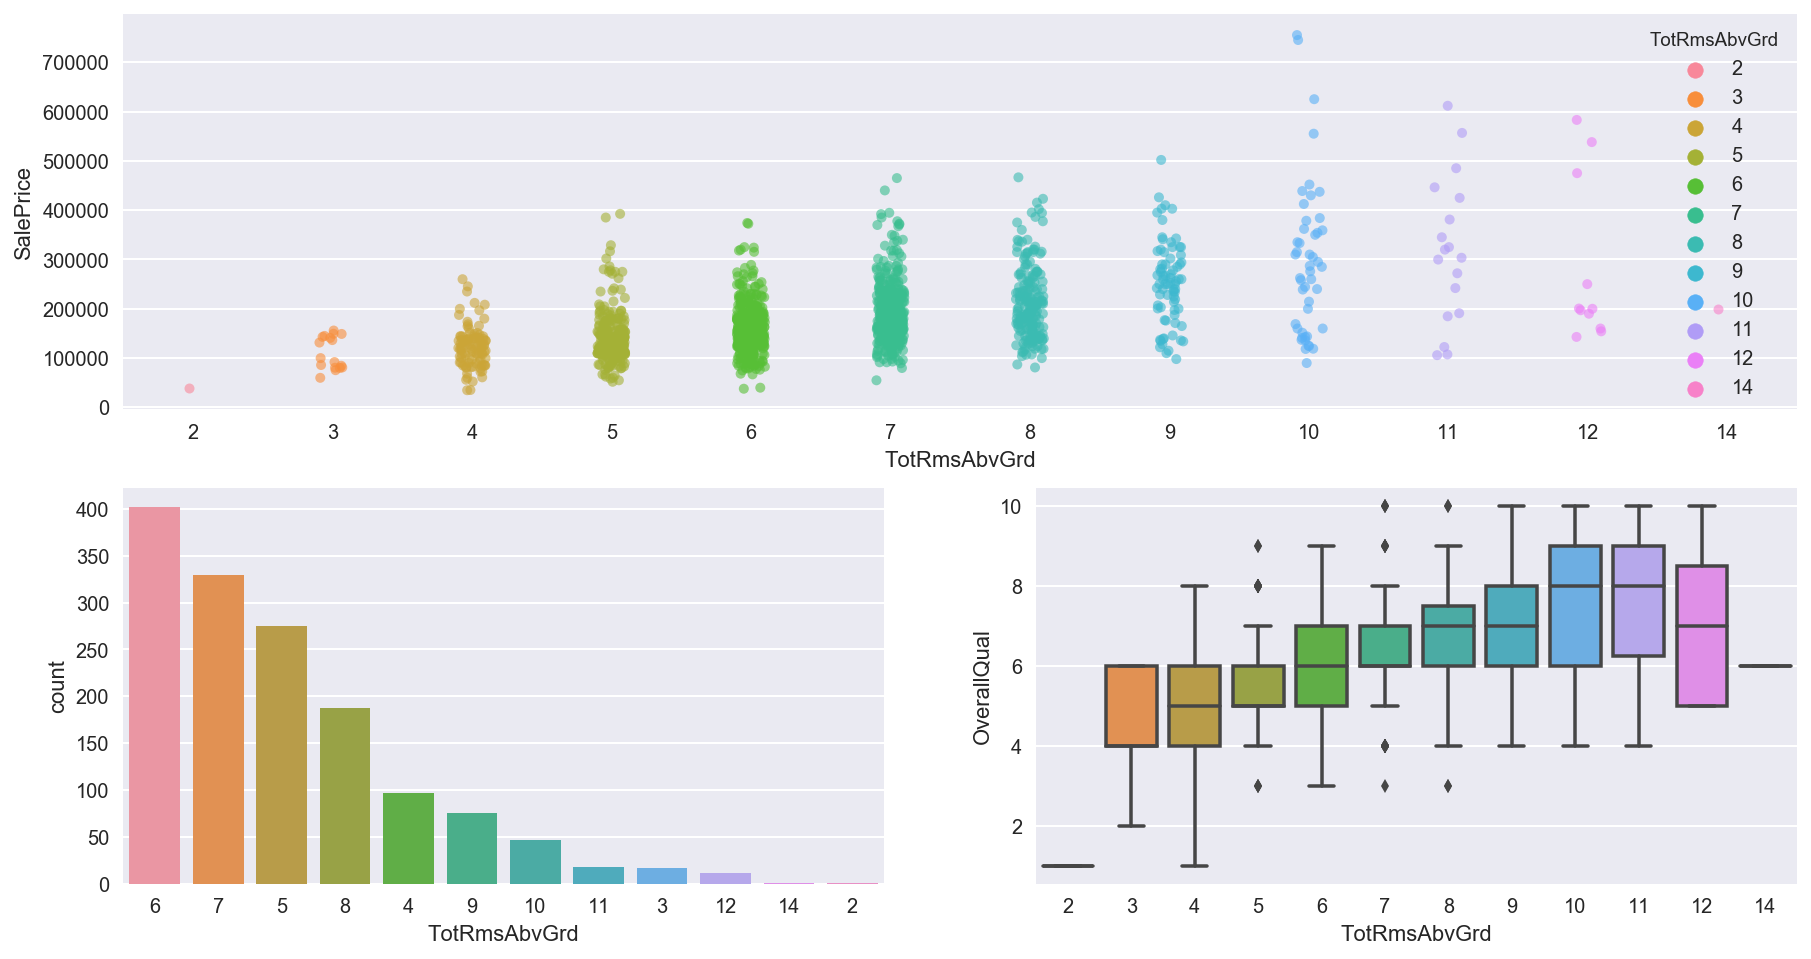

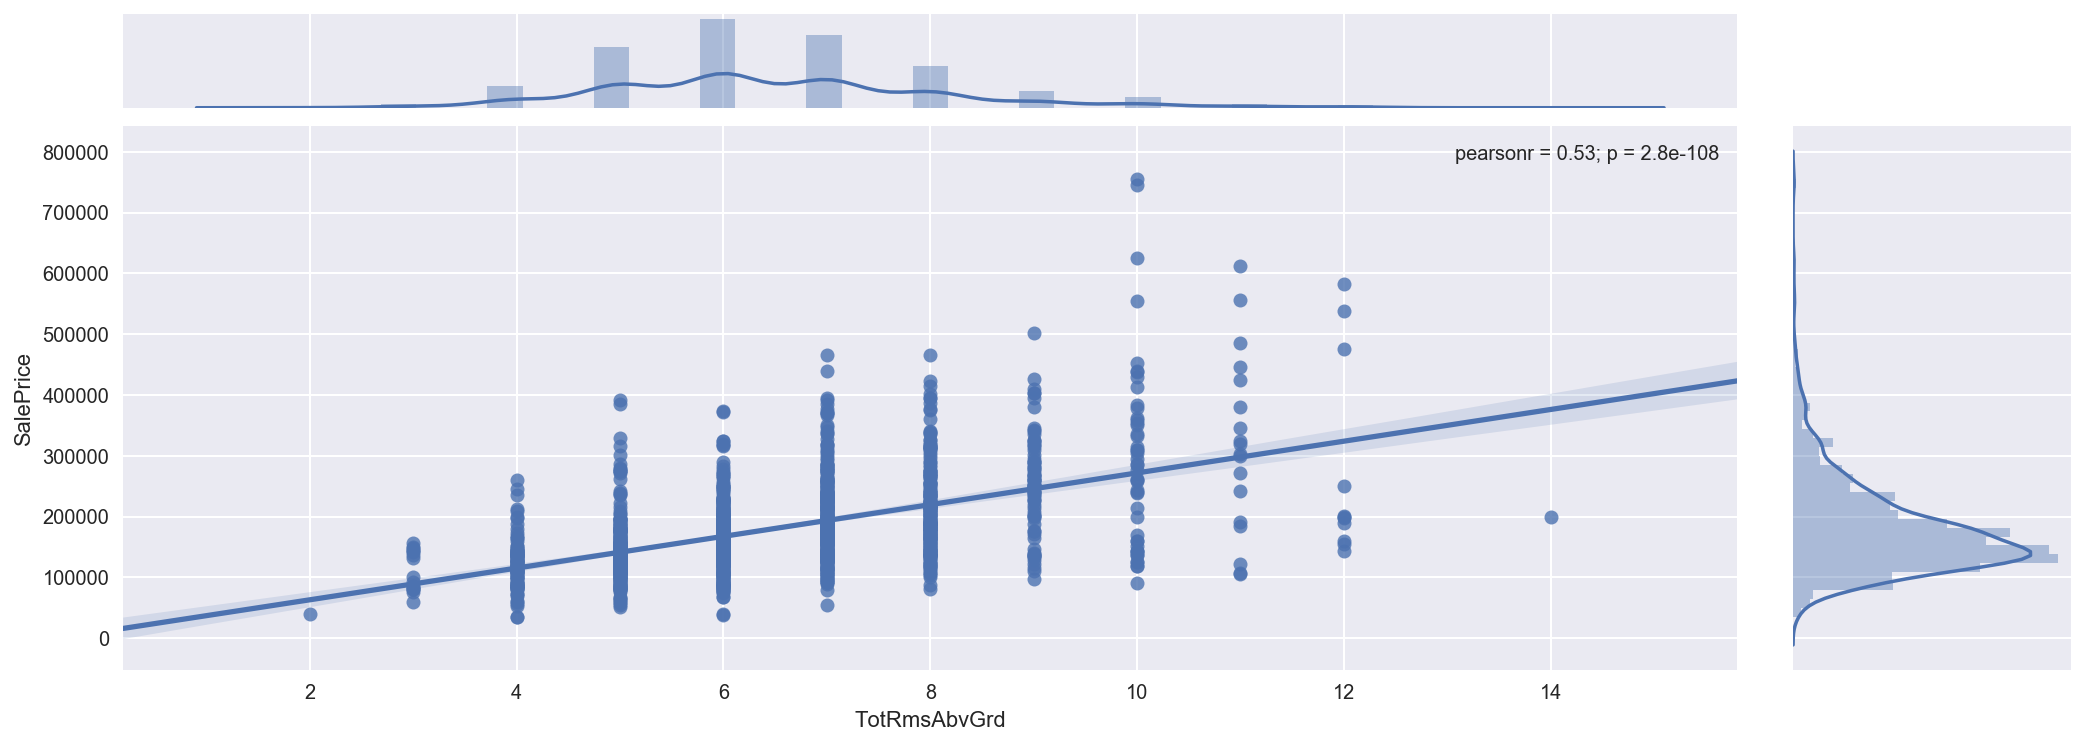

In [25]:
# Stripplot TotRmsAbvGrd / SalePrice
plt.figure(figsize=(15,8))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

# Countplot TotRmsAbvGrd
ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

# Boxplot TotRmsAbvGrd / OverallQual
ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()

# Jointplot TotRmsAbvGrd / SalePrice
grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 8)
grid.fig.set_size_inches(15,5)

#### Comment :

1. The higher the number of rooms (TotRmsAbvGrd), the higher the house prices tend to be.
2. The better the room, the better the quality of the house.

### 3. Feature Engineering

### 3-1 Missing Values

#### 3-1-1 Join Train and Test set
Combine Train and Test data and process missing data at once

In [26]:
# Save lenth of train and test set
ntrain = train.shape[0]
ntest = test.shape[0]

# Combine Train and Test data 
all_data = pd.concat((train, test)).reset_index(drop=True)
print("All data size is {}".format(all_data.shape))

All data size is (2919, 81)


#### 3-1-2 Statuse of missing values

Variables with Missing Qty :  [34]
Total Missing values Qty :  [13965]


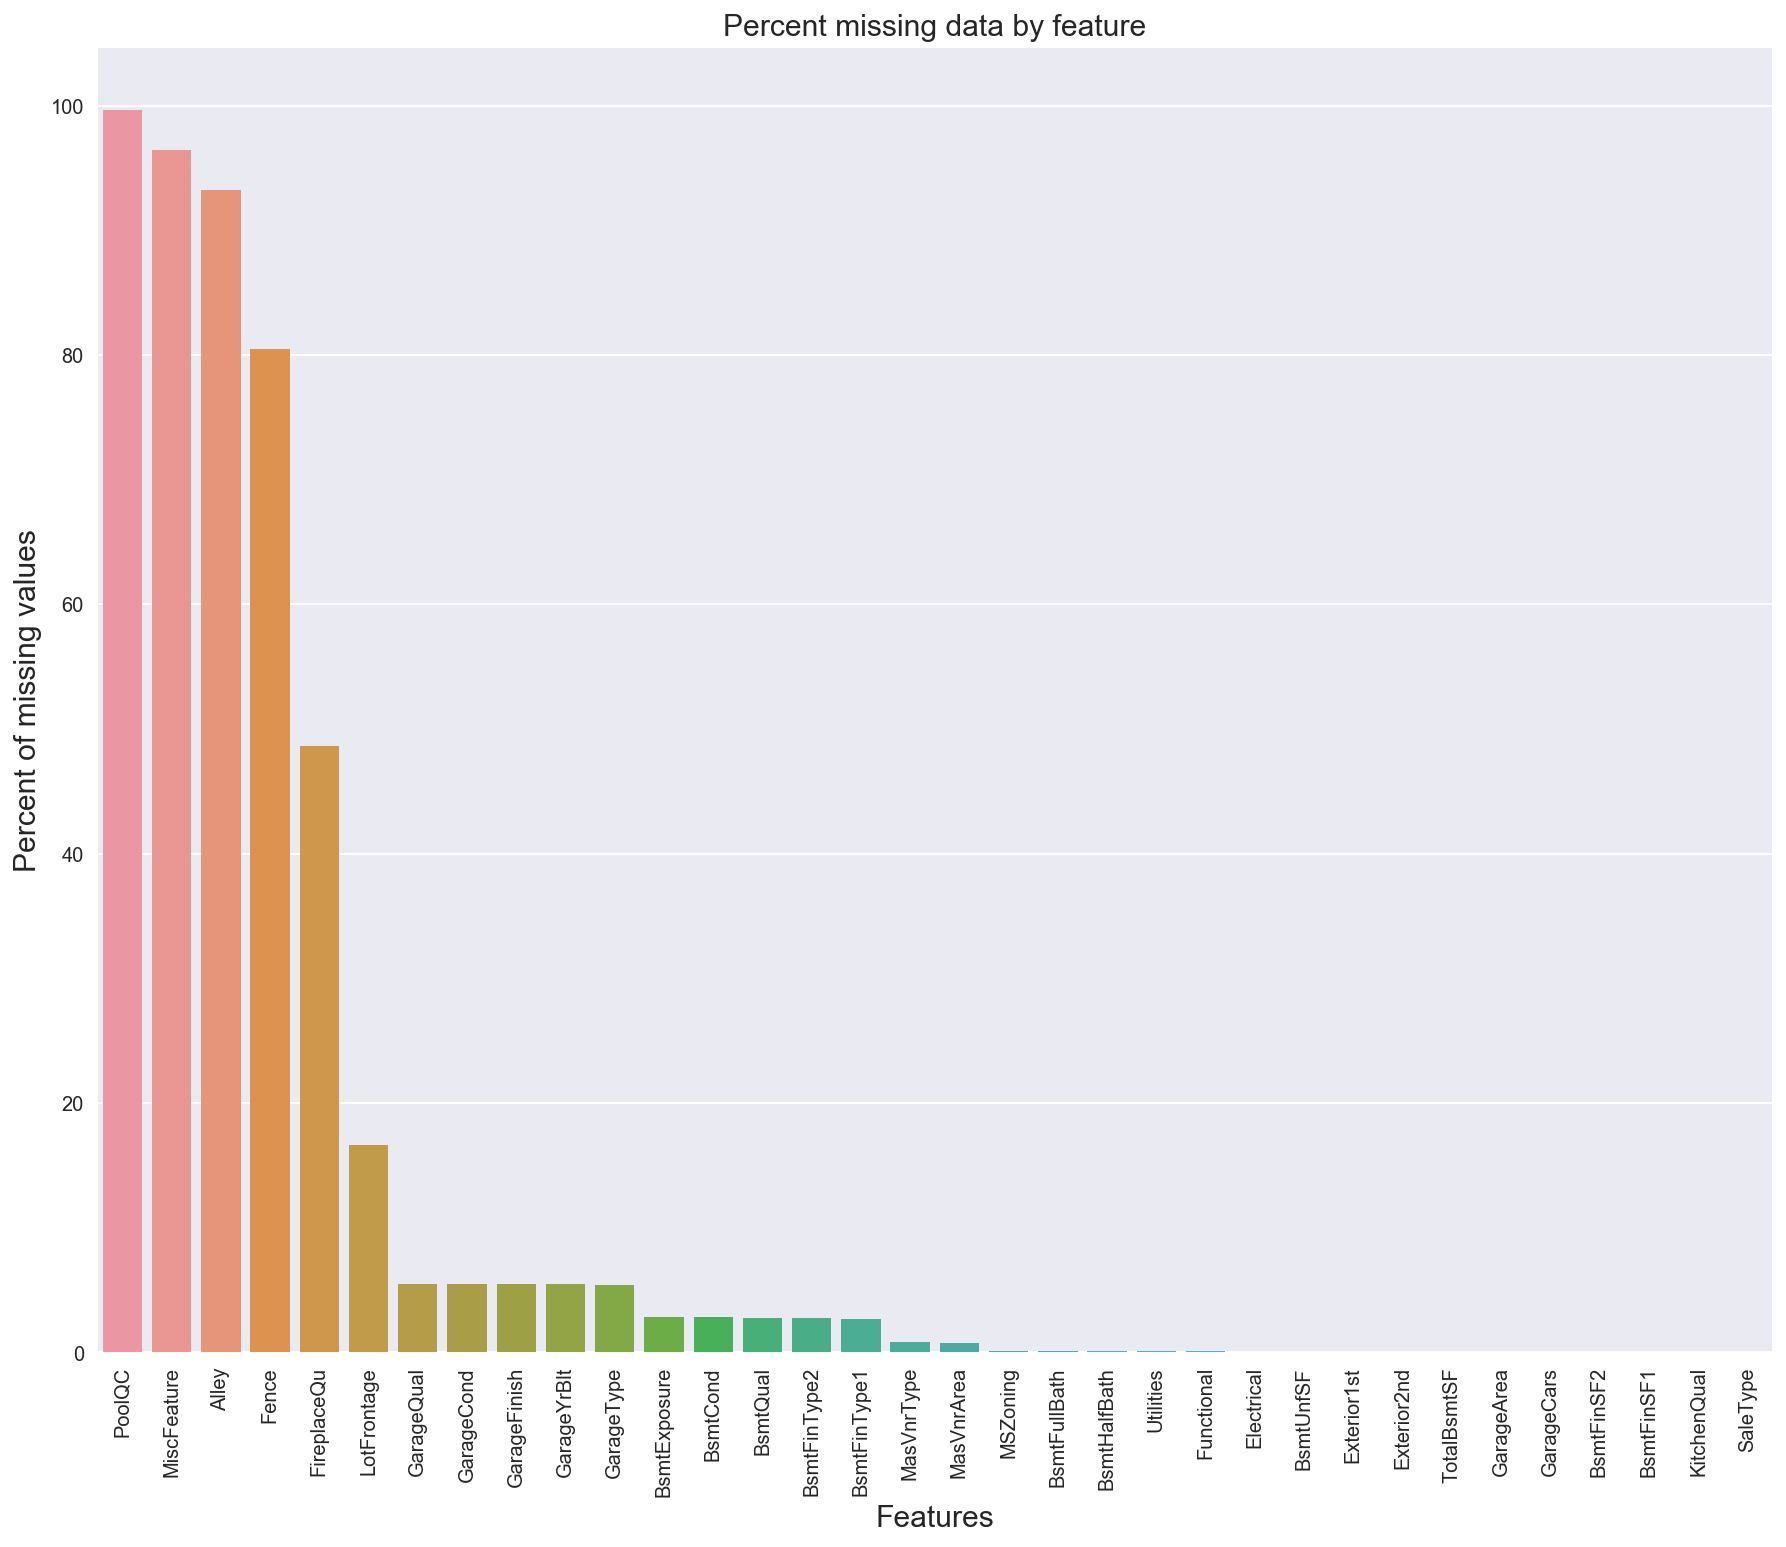

In [27]:
# To maintain the independence of all_data, copy it to all_data_cp and proceed with it
all_data_cp = all_data.copy()

# Drop saleprice column 
all_data_cp.drop(['SalePrice'], axis=1, inplace=True)


# Chck missing values 
all_data_null = all_data_cp.isnull().sum()
all_data_null = all_data_null.drop(all_data_null[all_data_null == 0].index).sort_values(ascending=False)
all_data_missing = pd.DataFrame({'Missing Numbers' :all_data_null})
all_data_null =  all_data_null / len(all_data_cp)*100

# Barplot missing values
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_null.index, y=all_data_null)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

print("Variables with Missing Qty : " , all_data_missing.count().values)
print("Total Missing values Qty : " , all_data_missing.sum().values)

34 attributes have missing values. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

#### 3-1-3 Missing Values processing

MSSubClass

 - Description : Identifies the type of dwelling involved in the sale
 - Process : 데이터가 고르게 분포되어있고 특정 데이터로 판단하기 어렵기에 None값으로 채워줌

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

SaleType
 - 변수 설명 : 집계약의 판매 방식을 기입   
 - 처리 방법 : 전체 데이터 중 87%가 WD (Warranty Deed - Conventional) 방식을 사용하고 있으므로 Missing Data을 WD로 채워넣었음 

In [ ]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

KitchenQual:
 - 변수 설명 : 부억의 품질
 - 처리 방법 : 전체 데이터 중 52%가 TA (Typical/Average)의 등급이 되어있으므로 Missing Data을  TA로 채워넣었음

In [ ]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

BsmtFinSF1 & BsmtFinSF2

 - 변수 설명 : 지하실의 마감 품질 
 - 처리 방법 : 두 데이터 모두 약35%의 데이터가 0으로 되어있으므로 Missing Data을 0으로 채워넣었음

In [ ]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

GarageCars  &  GarageArea & GarageYrBlt

 - 변수 설명 : 차고의 자동차 수 & 차고 크기 & 건축연한
 - 처리 방법 : 데이터가 missing이라는것은 차가 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [ ]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)

TotalBsmtSF

 - 변수 설명 : 지하실 면적의 총 평방 피트 (크기)
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [ ]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

BsmtUnfSF

 - 변수 설명 : 지하 공간의 미완성 된 공간의 크기
 - 처리 방법 : 데이터가 missing이라는것은 지하실이 없다는 것을 의미하기에 Missing Data를 0으로 채워넣음

In [ ]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

BsmtQual & BsmtCond

 - 변수 설명 : 지하실 높이에 따른 품질 & Condition
 - 처리 방법 : BsmtQual 데이터에서의 Nan값은 지하실이없어 품질 측정 BsmtCond같은 경우에도 비슷한 성격의 변수이기에 Nan값은 None으로 변환해줌

In [ ]:
all_data['BsmtQual']=all_data['BsmtQual'].fillna('None')
all_data['BsmtCond']=all_data['BsmtCond'].fillna('None')

BsmtExposure & BsmtFinType1 & BsmtFinType2

 - 변수 설명 : 지하실의 품질관련 변수 
 - 처리 방법 : 여기에서 Nan값은 지하실이 없는 집을 표기한것으로 None 값으로 변환

In [ ]:
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('None')

BsmtFullBath & BsmtHalfBath

 - 변수 설명 : 화장실 욕조 or 샤워시설 유무에 따라 Full&Half로 나눔 
 - 처리 방법 : Missing data는 욕실이 없음을 의미하다고 판단 Missing data를 0으로 채워넣음

In [ ]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)

Electrical

 - 변수 설명 : 전기 규격
 - 처리 방법 : 약 92%이상의 데이터가 SBrkr이라는 전기 규격을 사용 mode값으로 Missing Data 를 채워넣음

In [ ]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

Utilities

 - 변수 설명 : 사용 가능한 편의 시설
 - 처리 방법 : Test 데이터의 100%가 AllPub으로 이루어져 있어 큰 의미는 없다고 판단 drop 처리함

In [ ]:
all_data.drop(['Utilities'], axis=1, inplace=True)

MSZoning

 - 변수 설명 : 주거구역 설명  
 - 처리 방법 : 78%이상의 데이터가 RL로 이루어져 있어 mode값을 사용하여 Missing data들을 처리함

In [ ]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

MasVnrArea

 - 변수 설명 : 평방 피트 단위의 벽돌 무늬 겉치장
 - 처리 방법 : 약 60%의 데이터가 0이며, 치장이 안되어있는것으로 되어있어 Missing data들은 0으로 데이터를 넣어주어줌

In [ ]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

MasVnrType

 - 변수 설명 : MasVnrArea의 벽돌 무늬 유형
 - 처리 방법 : 약 60%의 데이터가 None 즉 치장이 안되어있는것으로 되어있어 Missing data들은 None 값으로 데이터를 넣어줌

In [ ]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

GarageType

 - 변수 설명 : 차고위치
 - 처리 방법 : Attchd, Detchd, BuiltIn, Basment, 2Types, CarPort 총 6가지 카테고리가 있고 여기에서 Nan값은 차고가 없는 사람을 표기한것으로 None 값으로 변환해줌

In [ ]:
all_data['GarageType']=all_data['GarageType'].fillna('None')

GarageYrBlt

 - 변수 설명 : 차고건축연도
 - 처리 방법 : 차고건축연도는 보통은 건축연도와 같기때문에 Nan값은 건축연도로 채워넣기로 함

In [ ]:
all_data['GarageYrBlt'][all_data['GarageYrBlt']>2150]
all_data['GarageYrBlt']=all_data['GarageYrBlt'].fillna(all_data['YearBuilt'][ all_data['GarageYrBlt'].isnull()])

GarageFinish, GarageCond, GarageQual

 - 변수 설명 : 차고 품질관련 카테고리 
 - 처리 방법 : 3가지 feature 모두 비슷한 데이터이고 nan값의 수도 동일함. 
   Nan값은 차고가 없는 사람을 표기한 것으로 None 값으로 처리

In [ ]:
all_data['GarageFinish']=all_data['GarageFinish'].fillna('None')
all_data['GarageCond']=all_data['GarageCond'].fillna('None')
all_data['GarageQual']=all_data['GarageQual'].fillna('None')

LotFrontage
 - 처리 방법 : Neighborhood를 그룹화하여 같은 Neighborhood내의 median값으로 처리

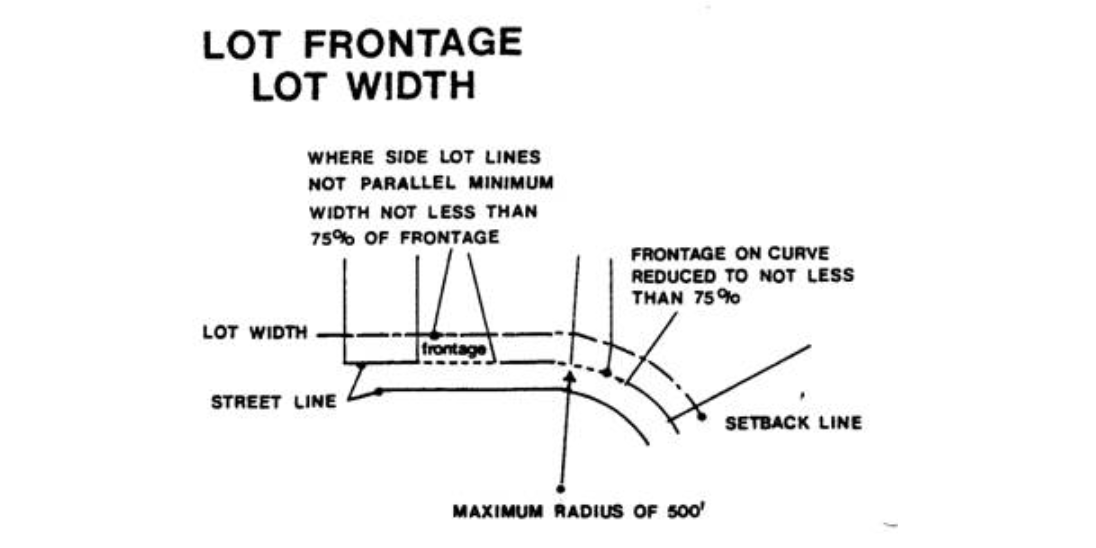

In [ ]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

FireplaceQu

 - 변수 설명 : 벽난로 품질
 - 처리 방법 : Nan값은 벽난로가 없는것을 표기한것으로 None 값으로 변환

In [ ]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

Fence

 - 변수 설명 : 울타리 품질
 - 처리 방법 : Nan값은 울타리가 없는 것이며, None 값으로 변환

In [ ]:
all_data['Fence']=all_data['Fence'].fillna('None')

Alley

 - 처리 방법 : Grvl,Pave 2가지의 카테고리값으로 이루어져있으며 Nan값은 인접한 골목이 없는것을 표기한것으로 None 값으로 변환

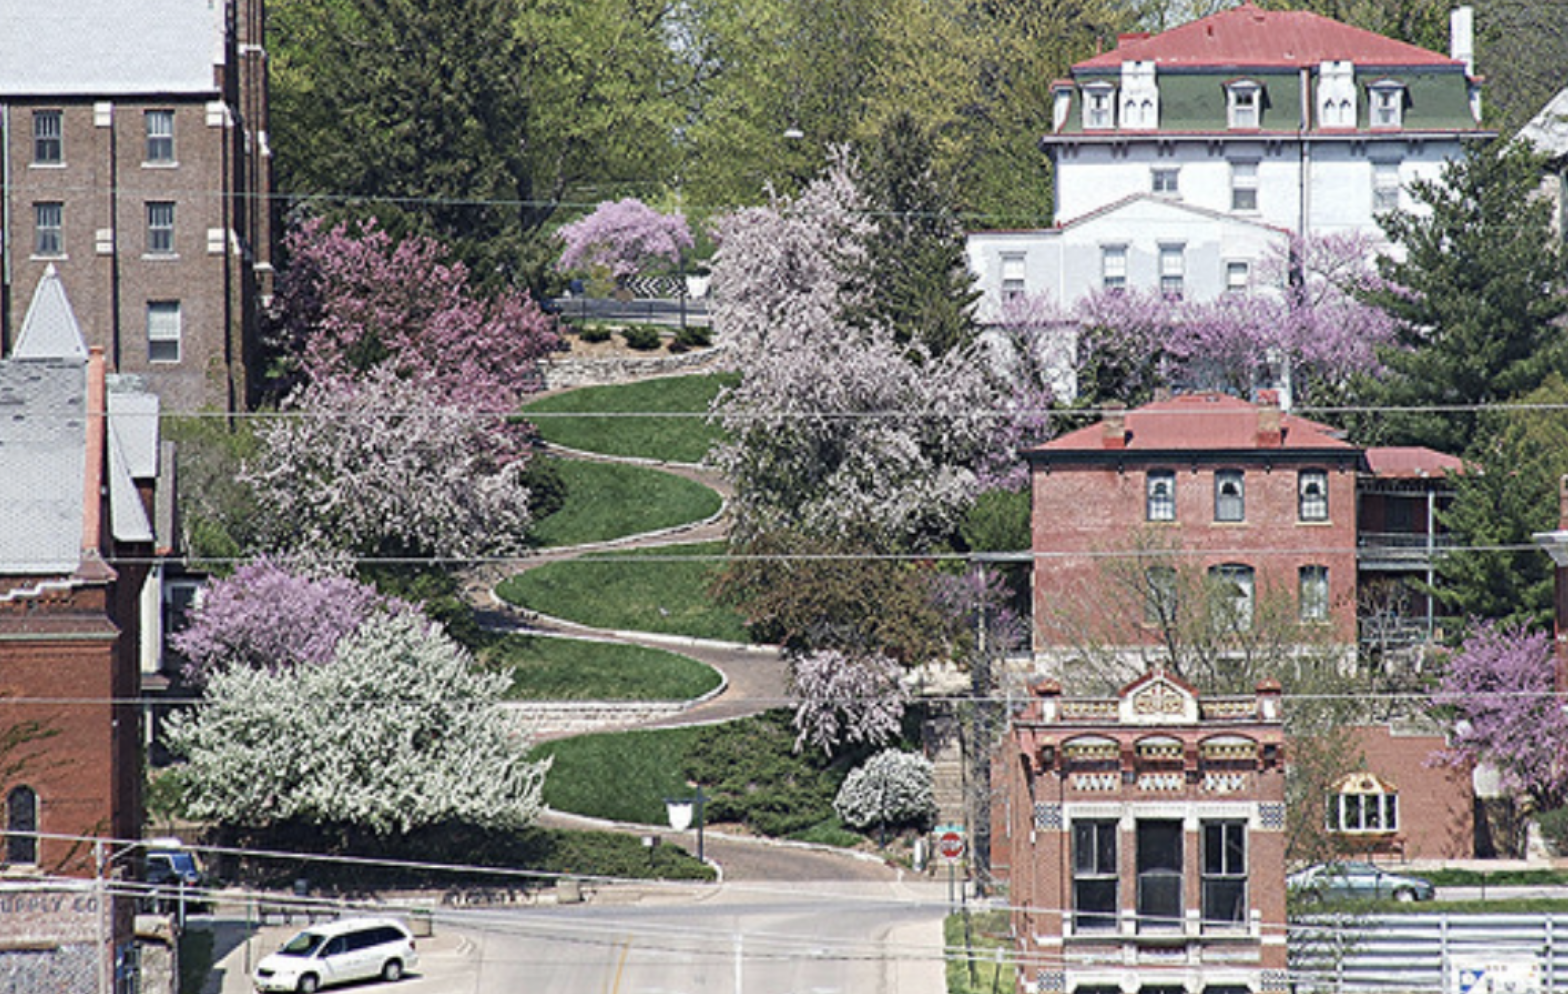

In [ ]:
all_data['Alley']=all_data['Alley'].fillna('None')

Functional

 - 변수 설명 : 집의 용도
 - 처리 방법 : 전체의 93%이상의 데이터가 Typ형식으로 이루어져있어 nan값들은 이 기능들에 포함되는 집이라 예측할 수 있어 Typ으로 대체

In [ ]:
all_data['Functional']= all_data["Functional"].fillna("Typ")

MiscFeature 

 - 변수 설명 : 범주에 나타나지 않은 기타 기능들
 - 처리 방법 : nan값들은 이 기능들을 포함하고 있지 않은 집이므로 none값으로 대체

In [ ]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

PoolQC

 - 변수 설명 : 수영장 품질
 - 처리 방법 : nan값들은 수영장을 포함하고 있지 않은 집이므로 none값으로 대체

In [ ]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

Exterior1st & Exterior2nd

 - 변수 설명 : 주택의 외장재
 - 처리 방법 : 대부분의 외장재가 VinylSd로 되어있어 VinylSd로 예측 nan값을 mode로 채워줌

In [ ]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

### 2-2 Feature Correlation

#### 2-2-1 Numerical Features
To explore the features, we will use Correlation matrix (heatmap style). 

In [ ]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

This heatmap is the best way to get a quick overview of features relationships. At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

'SalePrice' correlation matrix (High rank 15)

In [ ]:
# 'SalePrice correlation (High rank 15)
# k is number of variables 
k = 15

cor_numerical_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
print("Numerical Features Qty :" ,len(cor_numerical_cols), "\n")
print("Numerical Features     : \n",list(cor_numerical_cols))

#### Comments :

1. There are many strong correlations between SalePrice and variables.  OverallQual and GrLivArea are strongly correlated with SalePrice.

#### 2-2-2 Categorical Features

In [ ]:
# Select categorical features from train set
train_cat = train[categorical_features]
y_train_d = train['SalePrice']

# Dummy of category data
train_cat_dummies = pd.get_dummies(train_cat)

# Concatenate dummied categorical data with SalePrice
train_cat = pd.concat([y_train_d, train_cat_dummies], axis=1)
corrmat2 = train_cat.corr()

# High correlation coefficient 10
k = 10

cor_categorical_cols = corrmat2.nlargest(k, 'SalePrice')['SalePrice'].index 
cor_categorical_cols

### 2-3 OLS Model을 활용한 아웃라이어 결정 및 변수 선정

#### 2-3-1 정량적 변수 (Numerical Features) 사용

In [ ]:
# Prepare train and test set
train = all_data[:ntrain]
test = all_data[ntrain:]

# add_constant 
train = sm.add_constant(train)
train.tail()

In [ ]:
#Numerical features로 train 데이터 만들기
train_n = train[numerical_features]

#Numerical features로 이루어진 데이터 중 Id와 SalePrice를 제외시킴
train_n = train_n.drop(['Id', 'SalePrice'], axis=1)

#SalePrice에 로그를 적용해서 정규화진행
y_train_l = np.log1p(y_train_d)

In [ ]:
#OLS 모델에 적용 후 model1_1으로 저장
model1_1 = sm.OLS(y_train_l, train_n)
result1_1 = model1_1.fit()
# print(result1_1.summary())

#### 2-3-2 정성적 변수 (Categorical Features) 사용

In [ ]:
#Utilities은 제외함
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

#Categorical features로 이뤄진 데이터를 더미로 변환
train_c = pd.get_dummies(train[categorical_features])
train_c.tail()

In [ ]:
#OLS 모델에 적용 후 model1_2으로 저장
model1_2 = sm.OLS(y_train_l, train_c)
result1_2 = model1_2.fit()
# print(result1_2.summary())

#### 2-3-3 정량적 변수와  정성적 변수를 함께 사용

In [ ]:
#정량적 데이터와 정성적(더미) 데이터를 결합
train_all = pd.concat([train_n, train_c], axis=1)
train_all.tail()

In [ ]:
#OLS 모델에 적용 후 model1_3으로 저장
model1_3 = sm.OLS(y_train_l, train_all)
result1_3 = model1_3.fit()
# print(result1_3.summary())

#### 2-3-4 정량적 변수와 종속변수 (SalePrice)  상관계수 Top 14 사용

In [ ]:
#상관계수가 높은 15개 정량적 변수 저장
cor_numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1']

#15개의 정량적 변수를 이용하여 데이터 만들기
train_nc = train[cor_numerical_cols]
train_nc.tail()

In [ ]:
#OLS 모델에 적용 후 model1_4 로 저장
model1_4 = sm.OLS(y_train_l, train_nc)
result1_4 = model1_4.fit()
# print(result1_4.summary())

#### 2-3-5 상관계수가 높은 정량적 변수 14개와 정성적 변수 5개 사용

In [ ]:
#정성적 변수 5개를 이용하여 데이터 만들기
cor_categorical_cols = ['Neighborhood', 'ExterQual', 'KitchenQual',
       'BsmtQual', 'PoolQC']
train_cc = train[cor_categorical_cols]

#정량적 변수와 정성적 변수 결합
train_all_c = pd.concat([train_nc, train_cc], axis=1)
train_all_c.tail()

In [ ]:
#데이터를 더미 시킨 후 Constant변수 추가 
train_all_c = pd.get_dummies(train_all_c)
train_all_c = sm.add_constant(train_all_c)

train_all_c.tail()

In [ ]:
#OLS 모델에 적용 후 model1_5 로 저장
model1_5 = sm.OLS(y_train_l, train_all_c)
result1_5 = model1_5.fit()
# print(result1_5.summary())

#### 2-3-6 변수간 다중공선성과 분산분석 

#### (1) 변수간 다중공선성

 - 다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우를 말하며, 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우 발생함
 - 다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가
 - 상호의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용하며 숫자가 높을수록 다른 변수에 의존적임을 알 수 있음
 $$
 \text{VIF}_i = \frac{\sigma^2}{(n-1)\text{Var}[X_i]}\cdot \frac{1}{1-R_i^2}
 $$

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_all_c.values, i) for i in range(train_all_c.values.shape[1])]
vif["features"] = train_all_c.columns
vif.sort_values("VIF Factor", ascending = True).head(20)

#### Comment :

1. 정성적 변수 (Categorical Features) 제외하고 추출된 변수들 간의 다중공선성은 낮게 형성되어 있음 

#### (2) 정성적 변수 (Categorical Features)에 대한 분산 분석

 - 분산 분석(ANOVA: Analysis of Variance)은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법
 - 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데도 사용
 - TSS : 종속변수값의 움직임의 범위
 - ESS : 모형에서 나온 예측밧의 움직임의 범위
 - RSS : 잔차의 움직임의 범위, 즉 오차의 크기
 
 $$
 \dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} = \dfrac{R^2/(K-1)}{(1-R^2)/(N-K)} \sim F(K-1, N-K)
 $$

- 분산 분석표
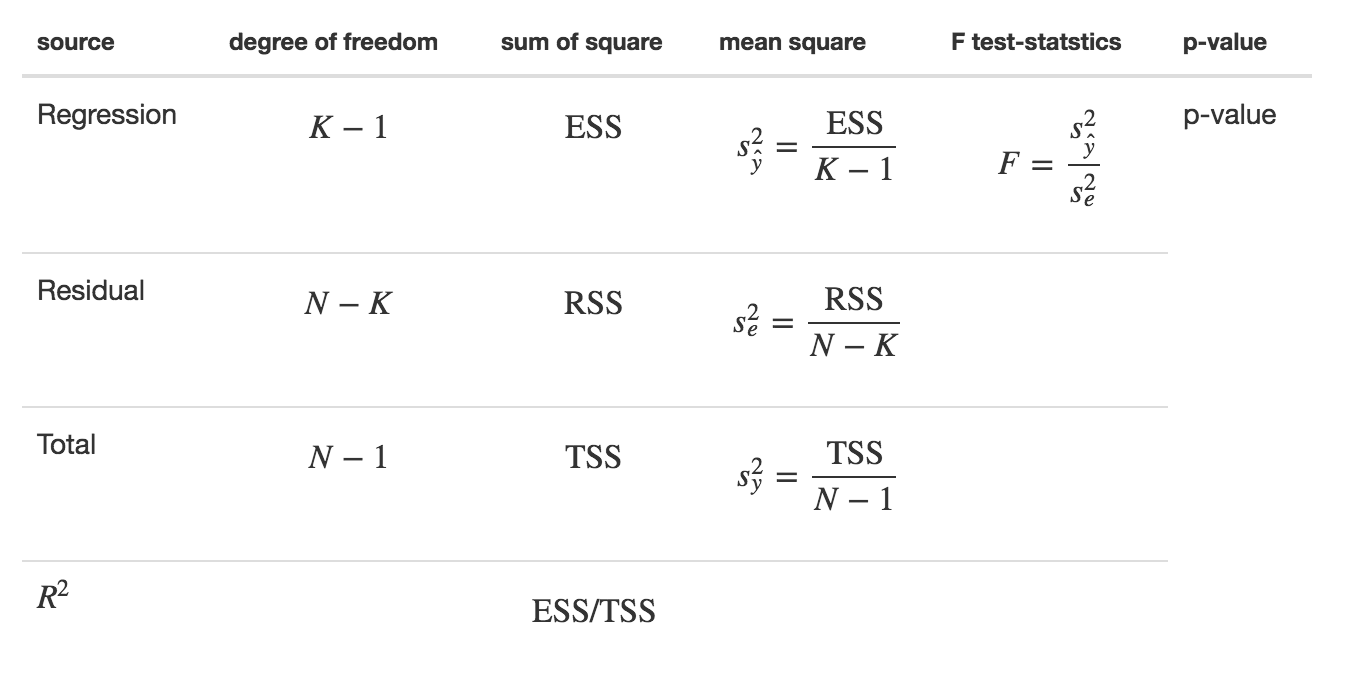

In [ ]:
#Neighborhood
model_cat = sm.OLS.from_formula("SalePrice ~ C(Neighborhood)", data=train)
sm.stats.anova_lm(model_cat.fit())

In [ ]:
#ExterQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(ExterQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

In [ ]:
#KitchenQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(KitchenQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

In [ ]:
#BsmtQual
model_cat = sm.OLS.from_formula("SalePrice ~ C(BsmtQual)", data=train)
sm.stats.anova_lm(model_cat.fit())

In [ ]:
#PoolQC
model_cat = sm.OLS.from_formula("SalePrice ~ C(PoolQC)", data=train)
sm.stats.anova_lm(model_cat.fit())

#### Comments :

1. 추출한 아웃라이어를 바탕으로 5가지 경우의 수를 만들어 모델1-1에 돌려봄

2. 성능을 비교한 결과 leverage와 cook's distance를 기준으로 한 아웃라이어를 사용

#### 2-3-6 변수사용별 성능비교

 1) $R_{adj}^2$ 모델별 비교 
 - 선형 회귀 모형에서 독립 변수가 추가되면 결정 계수$( R^2 )$의 값은 항상 증가함
 
 - 독립 변수 추가 효과를 상쇄하기위해 독립변수 갯수 K에 따라 결정 계수의 값을 조정하는 
   계수가 $R^2$이며, 1에 가까울수록 좋은 모형이라고 할 수 있음
$$
R_{adj}^2 = 1 - \frac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 +1-K}{n-K}
$$

In [ ]:
print("result1_1.rsquared_adj :", result1_1.rsquared_adj)
print("result1_2.rsquared_adj :", result1_2.rsquared_adj)
print("result1_3.rsquared_adj :", result1_3.rsquared_adj)
print("result1_4.rsquared_adj :", result1_4.rsquared_adj)
print("result1_5.rsquared_adj :", result1_5.rsquared_adj)

2) AIC (Akaike Information Criterion) 모델별 비교
 - AIC는 모형과 데이터의 확률 분포 사이의 Kullback-Leibler 수준을 가장 크게하며, 값이 작을수록 좋은 모형에 가깝움

$$
           \text{AIC} = -2\log L + 2K \
$$


In [ ]:
print("result1_1.aic :", result1_1.aic)
print("result1_2.aic :", result1_2.aic)
print("result1_3.aic :", result1_3.aic)
print("result1_4.aic :", result1_4.aic)
print("result1_5.aic :", result1_5.aic)

3) BIC 모델별 비교
 - BIC는 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형 likelihood를 측정하기 위한 값에서 유도되었으며, 값은 작을수록 좋은 모형에 가깝움

$$
           \text{BIC} = -2\log L + K\log n\
$$


In [ ]:
print("result1_1.bic :", result1_1.bic)
print("result1_2.bic :", result1_2.bic)
print("result1_3.bic :", result1_3.bic)
print("result1_4.bic :", result1_4.bic)
print("result1_5.bic :", result1_5.bic)

#### Comment : 

1. Adj. $R^2$: 모델 1과 4번째가 0.99로 가장 높고 비슷한 성능이 나옴
2. AIC : 모델 1과 3번째가 낮게 나옴 
3. BIC : 모델 1과 5번째가 낮게 나옴
4. 결론적으로 앞으로의 모델 검증은 모델 1을 기준으로 검증해 나갈예정

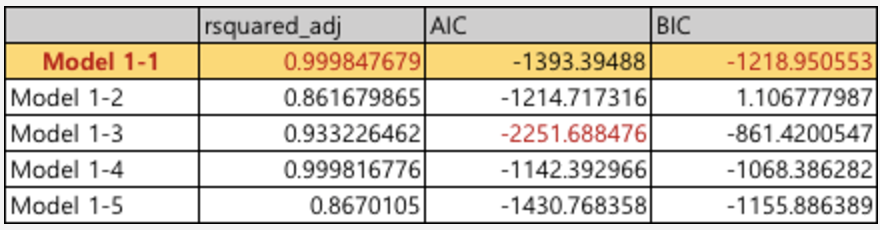

### 2-4 아웃라이어

1) IQR (Interquartile Range)를 이용한 아웃라이어 선택

 - IQR : 3사분위수(Q3)과 1사분위수(Q1)의 차이 (Q3 - Q1)
 - 박스-휘스커 플롯(Box-Whisker Plot) 외부 세로선은 1.5 X IQR 을 나타내며 그 선 바깥 점을 아웃라이어라고 함

In [ ]:
#IQR 아웃라이어 함수
def detect_outliers(data, feature):
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index.tolist()

    return outliers

In [ ]:
# GrLivArea, OverallQual, GarageArea 
GrLivArea_outliers = detect_outliers(train, "GrLivArea")
OverallQual_outliers = detect_outliers(train, "OverallQual")
GarageCars_outliers = detect_outliers(train, "GarageArea")

2) 표준화 잔차(resid)를 이용한 아웃라이어 선택

 - 잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 가지도록 스케일링한 것을 표준화 잔차(standardized residual 또는 normalized residual 또는 studentized residual) 라고 함
 
$$ 
r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}} 
$$

 - StatsModels의 RegressionResult(선형회귀 결과)의 resid_pearson 속성을 이용하여 표준화 잔차를 확인할 수 있으며, 2~4 보다 크면 아웃라이어라 함

In [ ]:
#model1_1에서 결과물에 대한 표준화 잔차 속성을 이용하여 2보다 큰 것을 아웃라이어로 지정
idx_r = np.where(result1_1.resid_pearson > 2)[0]

3) Cook's Distance 이용한 아웃라이어 선택

 - 레버리지와 잔차의 크기가 모두 커지면 Cook's Distance 또한 커짐 

$$ 
D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right]
$$

 - Fox' Outlier Recommendation 은 Cook's Distance가 다음과 같은 기준값보다 클 때 아웃라이어로 판단
 
 $$
 D_i > \dfrac{4}{N − K - 1}
 $$

In [ ]:
#model1_1에서 결과물에 대한 Fox' Outlier Recommendation 을 이용하여 아웃라이어로 지정
influence = result1_1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train_l) - len(train_n.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

4) 전체 아웃라이어 확인

In [ ]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()
print("resid_outliers:", len(resid_outliers),"개 \n", resid_outliers)
print("\t")
print("cooks_outliers:", len(cooks_outliers),"개 \n", cooks_outliers)
print("\t")
print("(IQR)GrLivArea_outliers:", len(GrLivArea_outliers),"개 \n", GrLivArea_outliers)
print("\t")
print("(IQR)OverallQual_outliers", len(OverallQual_outliers),"개 \n", OverallQual_outliers)
print("\t")
print("(IQR)GarageCars_outliers:", len(GarageCars_outliers),"개 \n", GarageCars_outliers)

#제거하길 추천한 outliers(data description)
recommended_outliers = [523, 898, 1298]

5) 아웃라이어 집단의 조합

 - IQR [ GrLivArea_outliers , OverallQual_outliers, GarageCars_outlier ] 아웃라이어

In [ ]:
IQR = list(set(GrLivArea_outliers) | set(OverallQual_outliers) | set(GarageCars_outliers))
print("IQR outliers :", len(IQR),"개 \n", IQR)

 - IQR2 [ GrLivArea_outliers,  GarageCars_outlier ] 아웃라이어

In [ ]:
IQR2 = list(set(GrLivArea_outliers) & set(GarageCars_outliers))
print("IQR2 outliers :", len(IQR2),"개 \n", IQR2)

 - Resid & Cook distance 아웃라이어

In [ ]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(resid_cooks ),"개 \n", resid_cooks)

 - Resid & Cook distance & IQR 아웃라이어

In [ ]:
resid_cooks_IQR = list(set(resid_cooks) | set(IQR))
print("Resid_Cooks_IQR :", len(resid_cooks_IQR),"개 \n", resid_cooks_IQR)

#### Comments :

1. 추출한 아웃라이어를 바탕으로 5가지 경우의 수를 만들어 모델 1-1에 돌려봄

2. 성능을 비교한 결과 leverage와 cook's distance를 기준으로 한 아웃라이어를 사용

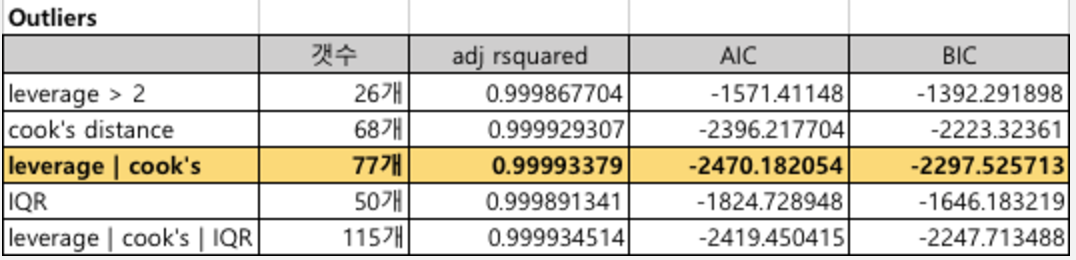

### 2-6 데이터 전처리

#### 2-6-1 Numerical 변수 선정
- select_1 : 모델 1-1의 결과값 중 P-value가 0.05이하인 변수를 선택

In [ ]:
# 모형 1의 결과값 중 P-value가 0.05이하인 변수를 선택
idx_t = np.where(result1_1.pvalues < 0.05)[0]
p_values = idx_t.tolist()

In [ ]:
#index 값을 컬럼 명으로 변경
x_train_cols = train_n.columns.tolist()

select_1 = []

for i in p_values:
    select_1.append(x_train_cols[i])

In [ ]:
# None 값이 많고, scale 에러가 나는 PoolArea, 1stFlrArea 제외
select_1 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold']
print("모형 1의 결과값 중 P-value가 0.05이하 변수 갯수 :",len(select_1),"개\n\n", \
      "모형 1의 결과값 중 P-value가 0.05이하 변수 :","\n",select_1)

- select_2 : select_1중 VIF factor를 기준으로 변수를 선택

In [ ]:
# select 1의 VIF를 확인
x_train_new = train[select_1]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values("VIF Factor", ascending = True)

In [ ]:
# 다중공선성이 높은 TotRmsAbvGrd, Yearsold, YearRemodAdd 제외
select_2 = ['LotArea', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'OverallQual']
print("다중공선성이 낮은 변수 갯수 :",len(select_2),"개\n\n", \
"다중공선성이 낮은 변수 :","\n",select_2)

- select_3 : 상관계수가 높은 14개의 변수

In [ ]:
select_3 = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']
print("상관계수가 높은 변수 갯수 :",len(select_3),"개\n\n", \
"상관계수가 높은 변수 :","\n",select_3)

- select_4 : select_2와 select_3의 합집합 변수

In [ ]:
select_4 = ['GarageYrBlt', 'GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("select_2와 select_3의 합집합 변수 갯수 :",len(select_4),"개\n\n", \
"select_2와 select_3의 합집합 변수 :","\n",select_4)

- select_5 : select_4중 VIF factor를 기준으로 변수를 선택

In [ ]:
# select 4의 VIF를 확인
x_train_new = train_n[select_4]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.values.shape[1])]
vif["features"] = x_train_new.columns
vif.sort_values(by="VIF Factor", ascending=True)

In [ ]:
# 다중공선상이 높은 GarageArea, GarageYrBlt 제외
select_5 = ['GarageCars', 'LotArea', 'YearBuilt', 'WoodDeckSF', 'MasVnrArea', 'KitchenAbvGr', 'TotalBsmtSF', 'BsmtFullBath', 'EnclosedPorch', 'ScreenPorch', 'BsmtFinSF1', 'Fireplaces', 'GrLivArea', 'FullBath', 'OverallQual', 'OverallCond']
print("select_4중 VIF factor 낮은 기준의 변수 갯수 :",len(select_5),"개\n\n", \
"select_4중 VIF factor 낮은 기준의 변수 :","\n",select_5)

#### 2-6-2 categorical 변수 선정
- select_c1 : 모델 1-5에서 사용한 상관계수가 높은 5개의 변수

In [ ]:
# 'PoolQC'는 train 더미 클래스와 test 더미 클래스가 매치하지 않는 것이 존재하므로 제외
select_c1 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

print("상관계수가 높은 5개의 변수 갯수 :",len(select_c1),"개\n\n", \
"상관계수가 높은 5개의 변수 :","\n",select_c1)

- select_c2 : 모델 1-3의 결과값 중 P-value가 0.005이하인 변수를 선택

In [ ]:
idx_t2 = np.where(result1_3.pvalues < 0.005)[0]
tvalues2 = idx_t2.tolist()

In [ ]:
x_train_cols2 = train_all.columns.tolist()

select_c = []

for i in tvalues2:
    select_c.append(x_train_cols2[i])

#카테고리 값 중 3개 이상 존재하는 값은 'MSZoning', 'Neighborhood', 'Condition2', 'RoofMatl', 'Functional

In [ ]:
# 'Condition2', 'RoofMatl', 'Functional'는 train 더미 클래스와 test 더미 클래스가 매치하지 않는 것이 존재하므로 제외
select_c2 = ['MSZoning', 'Neighborhood']
print("P-value가 0.005이하인 변수 갯수 :",len(select_c2),"개\n\n", \
"P-value가 0.005이하인 변수 :","\n",select_c2)

- select_c3 : select_c1와 select_c2의 합집합 변수

In [ ]:
select_c3 = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'MSZoning']
print("select_c1와 select_c2의 합집합 변수 갯수 :",len(select_c3),"개\n\n", \
"select_c1와 select_c2의 합집합 변수 :","\n",select_c3)

#### Comment :

1. numerical 변수를 먼저 돌려보고 성능을 비교함

2. numerical 변수 중 가장 좋은 변수를 고정하고, 카테고리 변수를 추가하여 비교함

3. select_1과 select_c3을 함께 돌린 성능이 가장 좋은 것으로 나옴

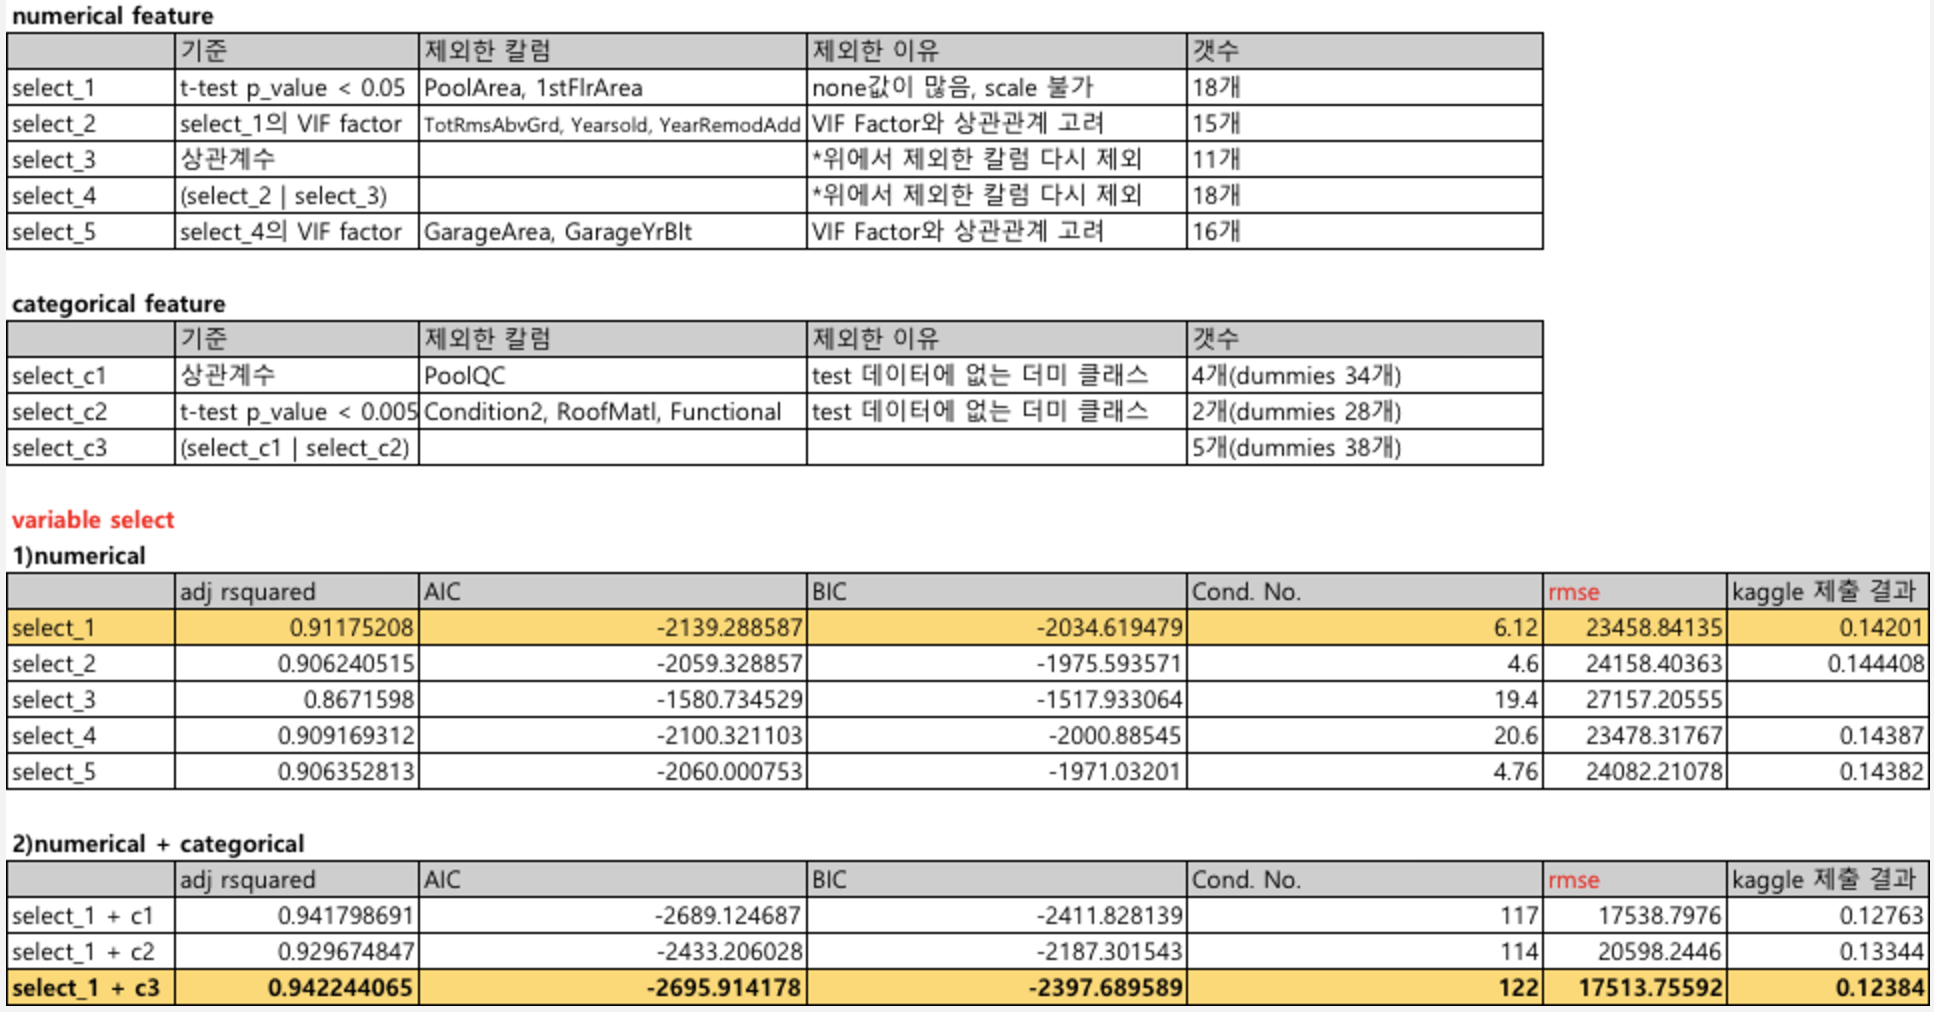

## 3. 모델링

### 3-1 모델 입력데이터 

In [ ]:
# 변수 선택 후 아웃라이어 제거
train_n = train_n[select_1]
train_n = train_n.drop(resid_cooks)

train_c = train[select_c3]
train_c = train_c.drop(resid_cooks)

# numerical 변수 log 변환 
train_n = np.log1p(train_n)

# numerical + categorical
x_train_new = pd.concat([train_n, train_c], axis=1)

# SalePrice 아웃라이어 제거
y_train_new = y_train_d.drop(resid_cooks)

#SalePrice log 변환
y_train_new = np.log1p(y_train_new)

# #from_formula 사용 위해
train_new = pd.concat([y_train_new, x_train_new], axis=1)
train_new.tail()

In [ ]:
#OSL 모델에 정량적 변수를 일괄적으로 스케일 처리하기위해 변수이름에 scale을 붙임
select_scale = []

for num in select_1:
    x = "scale(" + num + ")"
    select_scale.append(x)

formula = " + ".join(select_scale)
formula

In [ ]:
#OSL 모델에 Categorical 변수를 일괄적으로 스케일 처리하기위해 변수이름에 scale을 붙임
c_categorical = []

for num in select_c3:
    x = "C(" + num + ")"
    c_categorical.append(x)

formula = " + ".join(c_categorical)
formula

### 3-2 OLS 모델 

#### 3-2-1 OLS 모델 만들기

In [ ]:
#OLS모형에 입력데이터 넣기
model2_1 = sm.OLS.from_formula("SalePrice ~ scale(LotArea) + scale(OverallQual) + scale(OverallCond) + scale(YearBuilt) + scale(YearRemodAdd) + scale(BsmtFinSF1) + scale(TotalBsmtSF) + scale(GrLivArea) + scale(BsmtFullBath) + scale(FullBath) + scale(KitchenAbvGr) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(GarageCars) + scale(WoodDeckSF) + scale(EnclosedPorch) + scale(ScreenPorch) + scale(YrSold)+C(Neighborhood) + C(ExterQual) + C(KitchenQual) + C(BsmtQual) + C(MSZoning)", data=train_new)
result2_1 = model2_1.fit()
print(result2_1.summary())

In [ ]:
print("rsquared_adj :", result2_1.rsquared_adj)
print("AIC :", result2_1.aic)
print("BIC :", result2_1.bic)

#### Comments :

1. $R_{adj}^2$ 값은 1에 가깝지만 잔차 정규성은 0이므로 정규화는 이루지 못함
2. Numerical 변수의 P-Value는 0.05보다 적음으로 다 유의미한 변수임
3. AIC와 BIC는 낮으면 좋다고 하지만 음수인 경우는 확인이 필요함 

#### 3-2-2 ANOVA F-test

- ANOVA F검정은 각 독립변수의 중요도를 비교할 수 있음
- 방법 : 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하여 간접적으로 각 독립변수의 영향력을 측정
- PR(>F)값이 낮으면 낮을 수록 중요도가 높음

In [ ]:
sm.stats.anova_lm(result2_1, typ=2)

#### Comments :

1. 모든 변수의 PR(>F)가 가장 낮은 GrLivArea(거실 넓이)가 집값에 가장 큰 영향을 주는 것을 알 수 있음
2. 비교적 PR(>F)가 높은 TotRmsAbvGrd(방의 품질)은 집값에 영향이 작다는 것을 발견

#### 3-2-3 RMSE

 - statsmodels.tools.eval_measures.rmse를 이용하여 기존 SalePrice와 OLS로 예측한 SalePrice를 비교

In [ ]:
#Train 데이터의 SalePrice을 OLS 모형으로 예측하기
train_new2 = train_new.drop(['SalePrice'], axis=1)

y_train_new2 = result2_1.predict(train_new2)
y_train_new2 = np.exp(y_train_new2)
y_train_new2 = np.array(y_train_new2)

In [ ]:
#기존 Train 데이터의 SalePrice
y_train_new_a = np.array(y_train_new)
y_train_new = np.exp(y_train_new_a)

#기존 SalePrice와 OLS로 예측한 SalePrice를 비교
print("RMSE :", sm.tools.eval_measures.rmse(y_train_new, y_train_new2, axis=0))

#### 3-2-4 잔차의 정규성 검정

 - 확률론적 선형 회귀모형에 따르면 회귀분석에서 생기는 잔차 $e = y - \hat{w}^Tx$ 도 정규 분포를 따름

In [ ]:
#OLS 모형의 잔차의 카이제곱과 p-value 확인
test_norm = sms.omni_normtest(result2_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_norm):
    print("%-12s: %6.3f" % xi)

In [ ]:
#OLS 모형의 잔차를 QQ Plot으로 확인
sp.stats.probplot(result2_1.resid, plot=plt)
plt.show()

#### Comments :

1. OLS 모형의 잔차는 수치적으로는 정규성을 따르지 않지만, Probability Plot으로 봤을 경우, 거의 일직선에 가깝다는 것을 알 수 있음

### 3-3 집값 예측하기

In [ ]:
#test 데이터를 train 데이터의 정량적 변수를 이용하여 선택
test_new = test[select_1]

#test 데이터의 정량적 데이터의 정규화
test_new = np.log1p(test_new)

#test 데이터를 train 데이터의 정성적 변수를 이용하여 선택
test_new2 = test[select_c3]

#선택한 test의 정량적 데이터와 정성적 데이터를 결합
test_new = pd.concat([test_new, test_new2], axis=1)
test_new.tail()

In [ ]:
#OLS 모형에 가공한 test 데이터를 입력
y_new = result2_1.predict(test_new)

#예측된 test 데이터의 값을 Exponentional 하여 실제 가격으로 변환
y_new = np.exp(y_new)

#제출용 csv파일에 예측 값을 기입하기 위해 array형식으로 변환
y_new = np.array(y_new)
print(y_new)

In [ ]:
#샘플 파일 불러오기
submission = pd.read_csv("../Danny/Submit/sample_submission.csv")

#샘플 파일의 SalePrice에 예측 가격 기입
submission["SalePrice"] = y_new

#기입된 샘플파일 확인
print(submission.shape)
submission.head()

In [ ]:
#csv 파일형식으로 출력
submission.to_csv("1_submission.csv", index=False)